<div style="text-align: right" align="right"><i>Peter Norvig, December 2022</i></div>

# Advent of Code 2022

# [Day 0](https://adventofcode.com/2022): Preparation

I did [**Advent of Code**](https://adventofcode.com/) (AoC) again this year. (***Note***: I didn't finish all the puzzles. The [summary](#Summary) lists the two that I skipped.)

On AoC eve, I prepared by loading up my [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook:

In [1]:
%run AdventUtils.ipynb
current_year = 2022

Each day's solution consists of three or four steps:
- **Reading the Input:** using my `parse` utility, e.g. `in1 = parse(day=1, parser=ints, sections=paragraphs)`. 
- **Solving Part One**: find the solution and record it with, e.g., `answer(1.1, ...)`.
- **Solving Part Two**: find the solution and record it with, e.g., `answer(1.2, ...)`.
- **Exploration**: optionally play around a bit.

To fully understand each day's puzzle, and to follow along the drama involving elves, monkeys, elephants, and star fruit, you should read the day's puzzle description on the [**AoC**](https://adventofcode.com/) site, as linked in the header for each of my day's solutions, e.g. [**Day 1**](https://adventofcode.com/2022/day/1) below. Since you can't read Part 2 until you solve Part 1, I'll take some care to describe Part 2 more carefully in this notebook.

Happily for us all, [**@GaryJGrady**](https://twitter.com/GaryJGrady/) is drawing his cartoons again this year! Below, Gary's  elf makes his preparations:

<img src="https://pbs.twimg.com/media/Fi0-6hLX0AAav2b?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 1](https://adventofcode.com/2022/day/1): Calorie Counting

**Today's input** is a sequence of paragraphs, where each paragraph contains some integers. The numbers are calorie counts, and there is a complex backstory involving food for the elves, but to compute today's solution all we have to do is find the paragraph with the highest sum.

My `parse` function can be used to break the input into paragraphs and extract a tuple of integers from each one.  `parse` also shows the first few lines of the input file and the first few output records; this is helpful both for me as I write and debug the code and for you the reader trying to follow along.

In [2]:
in1 = parse(day=1, parser=ints, sections=paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2275 strs of size 0 to 5:
────────────────────────────────────────────────────────────────────────────────────────────────────
15931
8782
16940
14614

4829
12415
13259
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 268 tuples of size 1 to 15:
────────────────────────────────────────────────────────────────────────────────────────────────────
(15931, 8782, 16940, 14614)
(4829, 12415, 13259, 11441, 8199)
(2540, 2500, 6341, 2235, 1858, 4157, 5053, 6611, 1050, 4401, 6187, 1078, 3297)
(25264, 23014, 15952)
(10156, 4544, 4930, 11786, 15822)
(1264, 6399, 2031, 6892, 3115, 5151, 5093, 6724, 7001, 4011, 1458, 1945)
(2106, 2016, 1528, 2524, 6089, 4466, 3154, 2686, 3289, 5831, 1520, 2122, 5744)
(33066, 22616)
...
──────────────────────────────────────────────────────────────────────────────────────────

### Part 1: Find the Elf carrying the most Calories. How many total Calories is that Elf carrying?

That is, find the maximum sum among all the tuples of integers:

In [3]:
answer(1.1, 70116, lambda: 
       max(sum(elf) for elf in in1))

Puzzle  1.1:     0.0 msec, correct answer: 70116          

Note that the three arguments to `answer` are:
  1. The puzzle we are answering, in the form *day*.*part*, which ranges from 1.1 to 25.2.
  2. The correct answer as verified by AoC.
  3. A function to call to compute the answer (passed as a function so we can time how long it takes to run).

### Part 2: Find the top three Elves carrying the most Calories. How many Calories are those Elves carrying in total?

That is, find the sum of the 3 biggest sums of the tuples of integers:

In [4]:
answer(1.2, 206582, lambda: 
       sum(sorted(sum(elf) for elf in in1)[-3:]))

Puzzle  1.2:     0.0 msec, correct answer: 206582         

### Part 3: Recap

To be clear, here is exactly what I did to solve the day's puzzle:

1. Ran `in1 = parse(1, ints, paragraphs)` in a Jupyter Notebook cell, and examined the output. LGTM.
2. Solved Part 1: ran `max(sum(elf) for elf in in1)`, and saw the output, `70116`.
3. Copy/pasted `70116` into the [AoC Day 1](https://adventofcode.com/2022/day/1) answer box and submitted it.
4. Verified that AoC agreed the answer was correct. (Sometimes my code has a **bug**, and I need to repeat steps 2–4. You can search within this notebook for "**bug**" to find my major errors.)
5. Put`answer(1.1, 70116, lambda: max(sum(elf) for elf in in1))` in athe notebook, to record the answer.
6. Repeated steps 2–5 for Part 2.

<img src="https://pbs.twimg.com/media/Fi6Ryc0XEBIHBXq?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady" width=600>

# [Day 2](https://adventofcode.com/2022/day/2): Rock Paper Scissors 

**Today's input** is an encrypted strategy guide for playing multiple rounds of rock-paper-scissors. Each line has two one-letter strings indicating plays by the opponent and by me:

In [5]:
in2 = parse(2, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2500 strs of size 3:
────────────────────────────────────────────────────────────────────────────────────────────────────
C Y
B Z
B Z
C Y
B Y
C Z
C Z
C Y
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2500 tuples of size 2:
────────────────────────────────────────────────────────────────────────────────────────────────────
('C', 'Y')
('B', 'Z')
('B', 'Z')
('C', 'Y')
('B', 'Y')
('C', 'Z')
('C', 'Z')
('C', 'Y')
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: What would your total score be if everything goes exactly according to your strategy guide?

The instructions say that  "*The score for a single round is the score for the shape you selected (1 for Rock, 2 for Paper, and 3 for Scissors) plus the score for the outcome of the round (0 if you lost, 3 if the round was a draw, and 6 if you won).*" and that "*the first column is what your opponent is going to play: A for Rock, B for Paper, and C for Scissors. The second column– ... (Suddenly, the Elf is called away)*" 

We can only assume that X/Y/Z corresponds to my plays of Rock/Paper/Scissors, respectively.

It seems confusing that there are three different encodings of Rock/Paper/Scissors: A/B/C, X/Y/Z, and 1/2/3. I decided the least confusing approach would be to translate everything to 1/2/3. I include one test case, using `assert`:

In [6]:
RPS = Rock, Paper, Scissors = 1, 2, 3
rps_winner = {Rock: Paper, Paper: Scissors, Scissors: Rock}

def rps_score(opp: int, me: int) -> int:
    """My score for a round is 1/2/3 for my play plus 3 for draw and 6 for win."""
    return me + (6 if rps_winner[opp] == me else 3 if me == opp else 0)

assert rps_score(Rock, Paper) == 8 # I score 2 just for playing Paper; 6 for beating Rock
    
answer(2.1, 13268, lambda: 
       sum(rps_score('.ABC'.index(a), '.XYZ'.index(x)) for a, x in in2))

Puzzle  2.1:     0.4 msec, correct answer: 13268          

### Part 2: What would your total score be if everything goes exactly according to your strategy guide?

In Part 2 we see there was a misunderstanding in Part 1. The X/Y/Z letters do not mean that I should play rock/paper/scissors; rather "*the second column says how the round needs to end: X means you need to lose, Y means you need to end the round in a draw, and Z means you need to win.*" 

In [7]:
rps_loser = invert_dict(rps_winner)

def rps_score2(a: Char, x: Char) -> int:
    """First arg is 1=Rock/2=Paper/3=Scissors; second means X=lose/Y=draw/Z=win."""
    opp = '.ABC'.index(a)
    me = rps_loser[opp] if x == 'X' else opp if x == 'Y' else rps_winner[opp]
    return rps_score(opp, me)

answer(2.2, 15508, 
       lambda: sum(rps_score2(a, x) for a, x in in2))

Puzzle  2.2:     0.5 msec, correct answer: 15508          

### Part 3: Exploration

In regular Rock/Paper/Scissors, a sensible strategy (for both players) is a mixed strategy: play each of the possible moves 1/3 of the time, for an expected payoff of 1/2 of a win. But what about in the elves' variation of the game, where your score depends not only on whether you win, lose, or draw, but also on what you played (and your opponent's score depends on what they played)? This is a non-zero-sum game.

The two matrices below gives the payoffs for each of the nine combinations of possible plays. The left matrix gives the payoff for the player choosing a row, and the right for the player choosing a column. For example, if row plays R and col plays P, then the payoff to row in 1 and the payoff to col is 8.


     Payoff for row     Payoff for col
         R P S             R P S
       R 4 1 7           R 4 8 3
       P 8 5 2           P 1 5 9
       S 3 9 6           S 7 2 6
       
[Rahul Savani's Game Theory Explorer](https://cgi.csc.liv.ac.uk/~rahul/bimatrix_solver/) solves this game, and tells us that there is a Nash equilibrium where each player should play a mixed strategy with Rock 4/9 of the time, Paper 1/9, and Scissors 4/9, to get an expected payoff of 5 points. Note that if the players could collude, they could both agree to always play Scissors, and thus get 6 points per round rather than just 5. But both playing Scissors is not an equilibrium; either player could gain a point by defecting and playing Rock. Thus, this game is a prisoner's dilemma. 

# [Day 3](https://adventofcode.com/2022/day/3): Rucksack Reorganization

Each line of **today's input** is just a string of letters; the simplest input to parse:

In [8]:
in3 = parse(3)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 300 strs of size 16 to 48:
────────────────────────────────────────────────────────────────────────────────────────────────────
lflZfgnSnlmmlgGfjGthQPtLNsQhvbHLLpSS
zrCVDVFMJTCTcCJMwCThWbtbpbWpPbtbHPLQssLsHP
rBFcrwFzFwwVDcDrzTzJfnRGjllBdGZnnZfhqmdn
FjpnFRDmbRtnbJrFJmSTsGShWVhGqGVVsmqs
ZwPvNPdzNZwfzBNLdNNNNcLvhnQhqMTVsTGSWSqGqTdVWhMT
vgLZHfvLffNLPbggnrbFpJnCbC
hzJzGjGfqmGtDQtDSvVV
plpcMBNBcCTlTgCMbvtrsSVsVJDJlrwDQr
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: Find the item type that appears in both compartments of each rucksack. What is the sum of the priorities of those item types?

The letters correspond to **items** in the rucksack, and the two **compartments** of each rucksack correspond to the two halves of each input string. The **priority** of an item is 1–26 for a-z, and 27–52 for A–Z.

It turns out that `ascii_letters` is just what we need for priority, and I will use set intersection to find the one item that is guaranteed to be in common between the two halves. My utility function `split_at` divides a string into two parts at an index, and `the` makes sure there is exactly one letter in the intersection. 

In [9]:
def common_item(rucksack: str) -> Char:
    """The one letter that appears in both left and right halves of the input string."""
    compartments = split_at(rucksack, len(rucksack) // 2)
    return the(intersection(compartments))

def priority(c: Char) -> int: return string.ascii_letters.index(c) + 1

answer(3.1, 8401, 
       lambda: sum(priority(common_item(rucksack)) for rucksack in in3))

Puzzle  3.1:     0.3 msec, correct answer: 8401           

### Part 2: Find the item type that corresponds to the badges of each three-Elf group. What is the sum of the priorities of those item types?

The instructions now say that "*For safety, the Elves are divided into groups of three. Every Elf carries a badge that identifies their group. For efficiency, within each group of three Elves, the badge is the only item type carried by all three Elves.*" 

The itertools recipe `batched(in3, 3)` groups a sequence into subsequences of length 3; then we find "the" intersection of each group of three rucksacks and get its priority, and finally sum the priorities:

In [10]:
answer(3.2, 2641, lambda: 
       sum(priority(the(intersection(group))) for group in batched(in3, 3)))

Puzzle  3.2:     0.2 msec, correct answer: 2641           

<img src="https://pbs.twimg.com/media/FjE7eyPWAAAy2be?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady" width=600>

# [Day 4](https://adventofcode.com/2022/day/4): Camp Cleanup

Each line of **today's input** represents a pair of ranges of ID numbers for sections of camp that a given elf is assigned to clean up. I could parse the string `"18-20,19-21"` into the pair `(range(18, 21), range(19, 22))`, but I decided to use the 4-tuple `(18, 20, 19, 21)`.

In [11]:
in4 = parse(4, positive_ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs of size 7 to 11:
────────────────────────────────────────────────────────────────────────────────────────────────────
18-20,19-21
9-86,9-87
7-8,8-18
82-98,98-99
17-17,17-77
13-21,20-79
46-52,45-46
34-54,37-53
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples of size 4:
────────────────────────────────────────────────────────────────────────────────────────────────────
(18, 20, 19, 21)
(9, 86, 9, 87)
(7, 8, 8, 18)
(82, 98, 98, 99)
(17, 17, 17, 77)
(13, 21, 20, 79)
(46, 52, 45, 46)
(34, 54, 37, 53)
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: In how many assignment pairs does one range fully contain the other?

I could transform the input `18, 20` into the set `{18, 19, 20}` and then check if `{19, 20, 21}` is a subset (or vice versa). That would be easy, but it would be slow if the integers are huge. It is also easy to compare endpoints directly:

In [12]:
def fully_contained(lo, hi, LO, HI) -> bool:
    """Is the range `lo-hi` fully contained in `LO-HI`, or vice-veresa?"""
    return (lo <= LO <= HI <= hi) or (LO <= lo <= hi <= HI)

answer(4.1, 477, lambda: 
       quantify(fully_contained(*ranges) for ranges in in4))

Puzzle  4.1:     0.1 msec, correct answer: 477            

### Part 2: In how many assignment pairs do the ranges overlap?

Part 2 is very similar to Part 1; it asks if the two ranges have any overlap (intersection) at all.

In [13]:
def overlaps(lo, hi, LO, HI) -> bool:
    """Do the two ranges have any overlap?"""
    return (lo <= LO <= hi) or (LO <= lo <= HI)

answer(4.2, 830, lambda: 
       quantify(overlaps(*ranges) for ranges in in4))

Puzzle  4.2:     0.1 msec, correct answer: 830            

# [Day 5](https://adventofcode.com/2022/day/5): Supply Stacks

My `parse` function is primarily intended for the case where every record is parsed the same way. **Today's input** consists of two **sections**, each of which should be parsed differently:
- The first section is a **diagram**, showing stacks of crates that have been unloaded from the supply ships.  Each line in the diagram can be parsed by picking out the characters that are in the stacks; that is, the characters in column 1 and every 4th column after: `line[1::4]`.
- The second section is a list of **moves** to be performed by "*a giant cargo crane*". The move "move 8 from 7 to 1" means that the top 8 crates should be moved from stack 7 to the top of stack 1. Each line can be parsed with `ints` to get a 3-tuple of (number-of-crates, start-stack, end-stack). 

I handle this by having the first call to `parse` split the input into these two sections, then for each section `parser5` does another call to `parse` to handle each line of the section.

In [14]:
def parser5(paragraph) -> tuple:
    """Parse a paragraph which can be either a diagram or moves."""
    subparser = ints if 'move' in paragraph else (lambda line: line[1::4])
    return parse(paragraph, subparser)

in5 = parse(5, parser5, paragraphs, show=13)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 513 strs of size 0 to 35:
────────────────────────────────────────────────────────────────────────────────────────────────────
                [B]     [L]     [S]
        [Q] [J] [C]     [W]     [F]
    [F] [T] [B] [D]     [P]     [P]
    [S] [J] [Z] [T]     [B] [C] [H]
    [L] [H] [H] [Z] [G] [Z] [G] [R]
[R] [H] [D] [R] [F] [C] [V] [Q] [T]
[C] [J] [M] [G] [P] [H] [N] [J] [D]
[H] [B] [R] [S] [R] [T] [S] [R] [L]
 1   2   3   4   5   6   7   8   9 

move 8 from 7 to 1
move 9 from 1 to 9
move 4 from 5 to 4
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 tuples of size 9 to 503:
────────────────────────────────────────────────────────────────────────────────────────────────────
('    B L S', '  QJC W F', ' FTBD P P', ' SJZT BCH', ' LHHZGZGR', 'RHDRFCVQT', 'CJMGPHNJD', 'HBR ...
((8, 7, 1), (9, 1

### Part 1: After the rearrangement procedure completes, what crate ends up on top of each stack?

Rearranging means repeatedly popping a crate from one stack and pushing it on top of another stack, according to the move commands. I'll define `rearrange` to manipulate and return a dict of `{column: [crate, ...]}`, with the bottom crate first and the top crate last within each list. You never know what Part 2 will want, so `rearrange` will return the whole dict, and `tops` will pull out the top crate from each stack, which will be the puzzle solution. *Note*: my utility function `T` is matrix transpose: the input `diagram` is a sequence of rows; `T(diagram)` swaps them into a sequence of columns.

In [15]:
def rearrange(diagram, moves) -> dict[int, list[Char]]:
    """Given a diagram of crates in stacks, apply move commands.
    Then return a string of the crates that are on top of each stack."""
    stacks = {int(col[-1]): [L for L in reversed(col[:-1]) if L != ' '] 
              for col in T(diagram)}
    for (n, source, dest) in moves:
        for _ in range(n):
            stacks[dest].append(stacks[source].pop())
    return stacks
            
def tops(stacks) -> str: return cat(stacks[col][-1] for col in stacks)

answer(5.1, 'SHQWSRBDL', lambda: 
       tops(rearrange(*in5)))

Puzzle  5.1:     0.1 msec, correct answer: SHQWSRBDL      

### Part 2: The CrateMover 9001 is notable for ... the ability to pick up and move multiple crates at once. After the rearrangement procedure completes, what crate ends up on top of each stack?

In Part 1, when *n* crates were moved with a CrateMover 9000 crane, it was done one-at-a-time, so the moved crates ends up being reversed at their destination. In Part 2 the CrateMover 9001  can lift all *n* crates at once, and place them down without reversing them. I'll rewrite `rearrange` to handle either model. 

In [16]:
def rearrange(diagram, moves, model=9000) -> dict:
    """Given a diagram of crates in stacks, apply move commands.
    Then return a string of the crates that are on top of each stack."""
    stacks = {int(col[-1]): [L for L in reversed(col[:-1]) if L != ' '] 
              for col in T(diagram)}
    for (n, source, dest) in moves:
        stacks[source], crates = split_at(stacks[source], -n)
        if model == 9000: 
            crates = reversed(crates)
        stacks[dest].extend(crates)
    return stacks

I'll rerun Part 1 to make sure the new function definition is backwards compatible:

In [17]:
answer(5.1, 'SHQWSRBDL', lambda: 
       tops(rearrange(*in5)))

Puzzle  5.1:     0.1 msec, correct answer: SHQWSRBDL      

Here's the solution to Part 2:

In [18]:
answer(5.2, 'CDTQZHBRS', lambda: 
       tops(rearrange(*in5, model=9001)))

Puzzle  5.2:     0.1 msec, correct answer: CDTQZHBRS      

# [Day 6](https://adventofcode.com/2022/day/6): Tuning Trouble

**Today's input** is a single line of characters, representing signals from a handheld device:

In [19]:
in6 = the(parse(6))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str of size 4095:
────────────────────────────────────────────────────────────────────────────────────────────────────
qzbzwwghwhwdhdqhhbhfbfsstggdsssgzgdzzdbbbzmbzzvlldppjnjlltwtsszwswgssjnsjnnfqfzqqjzjfjmfmwfmfhfn ...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: How many characters need to be processed before the first start-of-packet marker is detected?

A start-of-packet marker is when there are *n* distinct characters in a row. We're asked to find the first place where that occurs. I initially **had a bug**: I read the instructions hastily and assumed they were asking for the *start* of the start-of-packet marker, not the *end* of it. When AoC told me I had a wrong answer, I read the instructions more carefully and figured it out.

In [20]:
def first_marker(stream, n=4) -> int:
    """The number of characters read before the first start-of-packet marker is detected."""
    return first(i for i in range(n, len(stream) + 1) if distinct(stream[i-n:i]))

def distinct(sequence) -> bool: return len(set(sequence)) == len(sequence)

answer(6.1, 1987, lambda: 
       first_marker(in6, 4))

Puzzle  6.1:     0.3 msec, correct answer: 1987           

### Part 2: How many characters need to be processed before the first start-of-message marker is detected?

A start-of-**message** marker is just like a start-of-**packet** marker, except it consists of 14 distinct characters rather than 4.

In [21]:
answer(6.2, 3059, lambda: 
       first_marker(in6, 14))

Puzzle  6.2:     0.9 msec, correct answer: 3059           

<img src="https://pbs.twimg.com/media/FjUoJ0TXEBIHU46?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady"  width=600>

# [Day 7](https://adventofcode.com/2022/day/7): No Space Left On Device 

**Today's input** is a transcript of shell commands and output on a computer that is in need of an upgrade. I'll make `parse` split each line into space-separated tokens:

In [22]:
in7 = parse(7, str.split)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1087 strs of size 4 to 19:
────────────────────────────────────────────────────────────────────────────────────────────────────
$ cd /
$ ls
dir bfbjzfd
dir mbc
dir psqmv
dir qqpgw
59022 rrqzqwl.frp
dir sscj
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1087 lists of size 2 to 3:
────────────────────────────────────────────────────────────────────────────────────────────────────
['$', 'cd', '/']
['$', 'ls']
['dir', 'bfbjzfd']
['dir', 'mbc']
['dir', 'psqmv']
['dir', 'qqpgw']
['59022', 'rrqzqwl.frp']
['dir', 'sscj']
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: Find all of the directories with a total size of at most 100000. What is the sum of the total sizes of those directories?

In the elvish operating system the "cd" and "ls" commands are similar to Unix/Linux, except the output format of "ls" differs: any subdirectory of the current directory is listed as "`dir` *name*", while any regular file is listed as "*number* *name*", where the number is the file size. The total size of a directory is the sum of all contained files, even those in sub-sub-directories.

I'll keep track of a **stack** of directories (as Unix/Linux does with the [dirs/pushd/popd](https://www.gnu.org/software/bash/manual/html_node/Directory-Stack-Builtins.html) commands). All I need to pay attention to in the transcript are `cd` commands (which change the `dirs` stack) and file size output (which I will use to increment the size of the current directory and all the parent directories in the stack). I'm making the assumption that the transcript is a systematic exploration that will not visit a subdirectory and issue an `ls` command twice. Given that assumption, I can ignore `ls` command lines and "`dir` *name*" output. My `browse` function examines the lines of the transcript and returns a Counter of `{directory_name: total_size}`. From that Counter I can sum the directory sizes that are under 100,000. 

In [23]:
def browse(transcript) -> Counter:
    """Return a Counter of {directory_name: total_size}, as revealed by the transcript."""
    dirs = ['/']      # A stack of directories
    sizes = Counter() # Mapping of directory name to total size
    for tokens in transcript:
        if tokens[0].isnumeric():
            for dir in dirs: # All parent directories get credit for this file's size
                sizes[dir] += int(tokens[0])
        elif tokens[0] == '$' and tokens[1] == 'cd':
            dir = tokens[2]
            if dir == '/':
                dirs = ['/']
            elif dir == '..':
                dirs.pop()
            else: # E.g. "cd bar" from current directory "foo" results in "foo/bar"
                dirs.append(dirs[-1] + dir + '/')
    return sizes   

answer(7.1, 1232307, lambda: 
       sum(v for v in browse(in7).values() if v <= 100_000))

Puzzle  7.1:     0.3 msec, correct answer: 1232307        

### Part 2: Find the smallest directory that, if deleted, would free up enough space on the filesystem to run the update. What is the total size of that directory?

I'm glad I chose to return the complete directory size Counter in Part 1; with that I can quickly find the smallest directory that frees up enough space. There is a bit of arithmetic to do; we're given the total available space on the disk (70 MB), and the needed space (30 MB). Once we compute the total amount of space used (the size of the root directory), we can pick the smallest directory whose size, when added to the currently unused space, gives us at least the needed space.

In [24]:
def free_up(transcript, available=70_000_000, needed=30_000_000) -> int:
    """What is the size of the smallest directory you can delete to free up enough space?"""
    sizes = browse(transcript)
    unused = available - sizes['/']
    return min(sizes[d] for d in sizes if unused + sizes[d] >= needed)

answer(7.2, 7268994,  lambda: 
       free_up(in7))

Puzzle  7.2:     0.3 msec, correct answer: 7268994        

# [Day 8](https://adventofcode.com/2022/day/8): Treetop Tree House

**Today's input** is a grid of single-digit numbers representing the heights of trees in a forest:

In [25]:
in8 = parse(8, digits)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 99 strs of size 99:
────────────────────────────────────────────────────────────────────────────────────────────────────
102200120221123133322123221134224301040024344534431245323303212210030001244234132301200020310012011
210101220131232022104432220132221131234351145114524135253112332342312410211104233102330122201111010
002220112233222031400442434031011023425412431121343221233533224144034042201244323431032200232101012
200202231012120110032413231132224255311432523511252253221451514335154032332342133133133321000002220
021023013300203310410132030422351131224513211322513324212421215535543510221102312443303330132321201
001000330003220124130413311435314333354422521213321212242324211253514231442434324114124112323213001
100102012222213131014440444431424445231224532554231331431314545111552115245032312032141101232330001
112030330123430022102413341315541514452151222122465233323221252

### Part 1: Consider your map; how many trees are visible from outside the grid?

A tree is visible if all the trees in front of it, from the viewing direction, are shorter. With only 99 × 99 ≈ 10,000 total trees, I'll take the brute force approach of considering every location in the grid, and checking if it is visible: if, for **any** direction, **all** the points in that direction have a shorter tree:

In [26]:
def visible_from_outside(grid) -> int:
    """How many points on grid are visible from the outside?
    Points such that, for some direction, all the points in that direction have a shorter tree."""
    def is_visible(loc) -> bool: 
        return any(all(grid[p] < grid[loc] for p in go_in_direction(loc, dir, grid))
                   for dir in directions4)
    return quantify(grid, is_visible)

def go_in_direction(start, direction, grid) -> Iterable[Point]:
    """All the points in grid that are beyond `start` in `direction`."""
    while True:
        start = add2(start, direction)
        if start not in grid:
            return
        yield start

answer(8.1, 1829, lambda: 
       visible_from_outside(Grid(in8)))

Puzzle  8.1:    20.8 msec, correct answer: 1829           

### Part 2: Consider each tree on your map. What is the highest scenic score possible for any tree?

The **scenic score** of a tree is the product of the viewing distance in each of the four directions. To measure the viewing distance, go in one direction and "*stop if you reach an edge or at the first tree that is the same height or taller*." If I had chosen better abstractions for Part 1, perhaps I could re-use more. As it is,  I'll need two new functions to solve Part 2:

In [27]:
def scenic_score(loc, grid) -> int:
    """The product of the number of trees you can see in each of the 4 directions."""
    return prod(viewing_distance(loc, dir, grid) for dir in directions4)

def viewing_distance(loc, direction, grid) -> int:
    """The number of trees you can see from this location in this direction."""
    seen = 0
    for seen, p in enumerate(go_in_direction(loc, direction, grid), 1):
        if grid[p] >= grid[loc]:
            break
    return seen

answer(8.2, 291840, lambda grid=Grid(in8): 
       max(scenic_score(p, grid) for p in grid))

Puzzle  8.2:    22.3 msec, correct answer: 291840         

### Part 3: Exploration

I can visualize the forest. In the plot below darker green means taller trees, and the red dot is the most scenic spot. (I have a utility function, `naked_plot`, that plots points without the distracting axis lines and  numbers. But it is not set up to do a plot that has different colors, so I do that in a separate call to `plt.scatter`.)

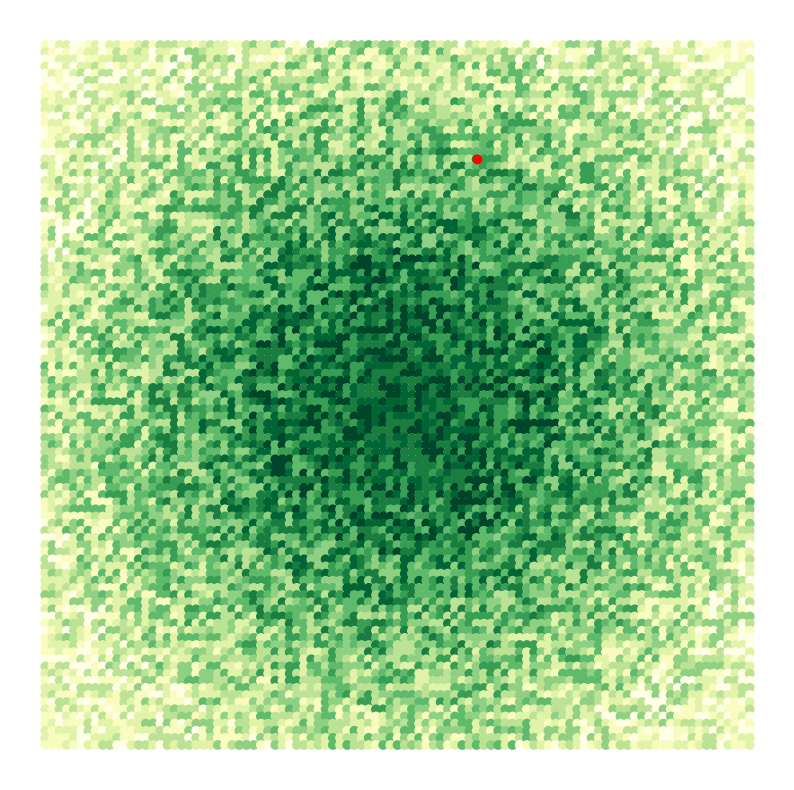

In [28]:
grid = Grid(in8)
most_scenic = max(grid, key=lambda p: scenic_score(p, grid))
naked_plot([most_scenic], 'ro')
plt.scatter(*T(grid), c=list(grid.values()), cmap='YlGn');

We can see above that the taller growth is towards the center of the forest. But how does the scenic score vary? Below I plot scenic score, low being yellow, medium orange, and high red. The area with the tallest trees does not have the highest scenic scores. I think that's because when all the neighboring trees are tall, there's bound to be a neighbor that blocks the view. In the outskirts where trees are shorter, it is easier for a lone tree to satnd above the rest.

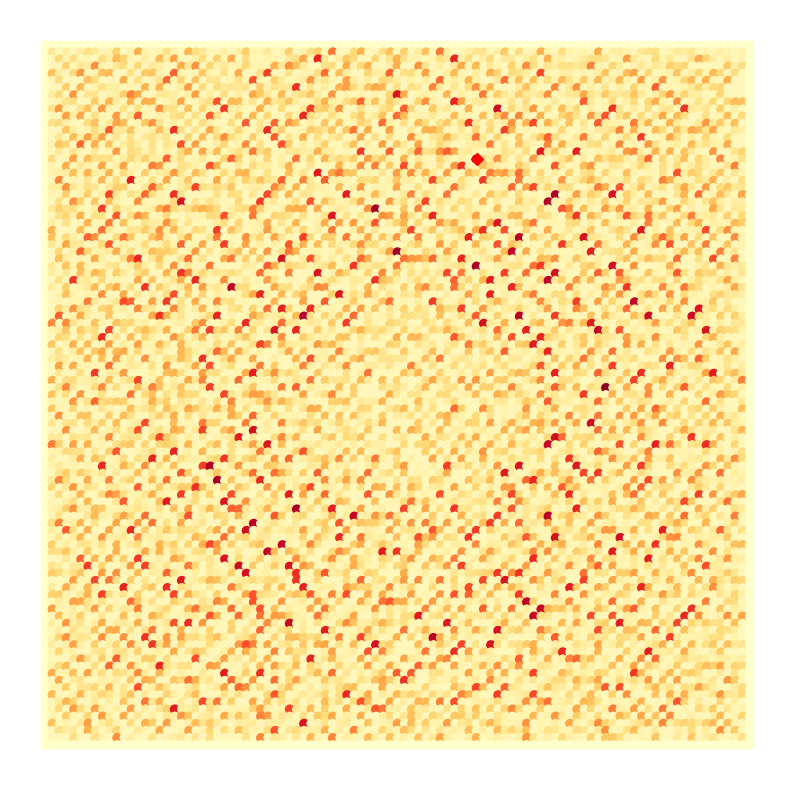

In [29]:
naked_plot([most_scenic], 'rD')
plt.scatter(*T(grid), c=[log(scenic_score(p, grid) + 1) for p in grid], cmap='YlOrRd');

# [Day 9](https://adventofcode.com/2022/day/9): Rope Bridge

**Today's input** consists of command lines, each of which we can parse as a tuple of two atoms, a command name and an integer:

In [30]:
in9 = parse(9, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2000 strs of size 3 to 4:
────────────────────────────────────────────────────────────────────────────────────────────────────
L 1
R 1
U 1
R 1
L 1
U 2
L 2
R 1
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2000 tuples of size 2:
────────────────────────────────────────────────────────────────────────────────────────────────────
('L', 1)
('R', 1)
('U', 1)
('R', 1)
('L', 1)
('U', 2)
('L', 2)
('R', 1)
...
────────────────────────────────────────────────────────────────────────────────────────────────────


These are motion commands for the head of a rope: move "L"eft, "R"right, "U"p, or "D"own by the specified number of units on a grid. The rope consists of two "knots", one at the head, and one a short distance away at the tail. The tail must follow the head, so that it is always at or adjacent to the head's location (in any of the 8 directions). There are several ways for the tail to move to stay adjacent, but the instructions specify exactly one way: "*if the head is ever two steps directly up, down, left, or right from the tail, the tail must also move one step in that direction*" and "*if the head and tail aren't touching and aren't in the same row or column, the tail always moves one step diagonally*."

### Part 1: Simulate your complete hypothetical series of motions. How many positions does the tail of the rope visit at least once?

The rules for how the tail moves are a bit tricky, but otherwise the control flow is easy. I can't make the head leap *n* steps ahead all at once, and then make the tail leap to catch up, because I'd miss the intermediate locations of the tail. I need to take the *n* steps one at a time. 

I'll have `move_rope` return the set of visited squares (not just their count), in case I need it in Part 2. I provide for an optional `start` position. The count of visited squares would be the same no matter where the rope starts, but for debugging it is easier to follow the example in the puzzle description if I can start at the same location they start at (and I did initially have a **bug** where `move_tail` wasn't moving diagonally properly). Note that `arrow_direction` is defined in [AdventUtils](AdventUtils.ipynb) such that `arrow_direction['L'] == West == (-1, 0)`, etc.

In [31]:
def move_rope(motions, start=Zero) -> set[Point]:
    """Move rope according to `motions`; return set of points visited by tail."""
    H = T = start # Points for the Head and Tail of the rope
    visited = {start}
    for (op, n) in motions:
        for step in range(n):
            H = add2(H, arrow_direction[op])
            T = move_tail(T, H)
            visited.add(T)
    return visited

def move_tail(T: Point, H: Point) -> Point:
    """Move tail to be closer to head if it is not already adjacent."""
    dx, dy = sub(H, T)
    if max(abs(dx), abs(dy)) > 1:
        T = add2(T, (sign(dx), sign(dy)))
    return T
            
answer(9.1, 6236, lambda: 
       len(move_rope(in9)))

Puzzle  9.1:     5.0 msec, correct answer: 6236           

### Part 2: Simulate your complete series of motions on a larger rope with ten knots. How many positions does the tail of the rope visit at least once?

For Part 2 the rope is longer, with ten knots, each of which must stay at-or-adjacent to the one immediately in front of it as the head moves. I'll re-write `move_rope` to take an optional argument giving the number of knots in the rope (the default is 2). Then instead of just one `move_tail` per loop, I'll move all the non-head knots in the rope.  

In [32]:
def move_rope(motions, start=Zero, knots=2) -> set[Point]:
    """Move multi-`knots` rope according to `motions`; return set of points visited by tail."""
    rope = [start] * knots # Positions of each knot in the rope
    visited = {start}
    for (op, n) in motions:
        for step in range(n):
            rope[0] = add2(rope[0], arrow_direction[op])
            for k in range(1, knots):
                rope[k] = move_tail(rope[k], rope[k - 1])
            visited.add(rope[-1])
    return visited

The re-write is backwards compatible:

In [33]:
answer(9.1, 6236, lambda: 
       len(move_rope(in9)))

Puzzle  9.1:     7.4 msec, correct answer: 6236           

Here's the 10-knot solution:

In [34]:
answer(9.2, 2449, lambda: 
       len(move_rope(in9, knots=10)))

Puzzle  9.2:    34.4 msec, correct answer: 2449           

### Part 3: Exploration

I can plot the tail of the rope (for various size ropes). One interesting thing is that as the rope gets longer, the tail moves less. I guess the reason is that if any knot in the rope does not end up two spaces away from the one in front of it, then it does not move, and neither do any of the following knots. For a twisty-shaped rope this is bound to happen pretty frequently, so the tailmost knots move less often.

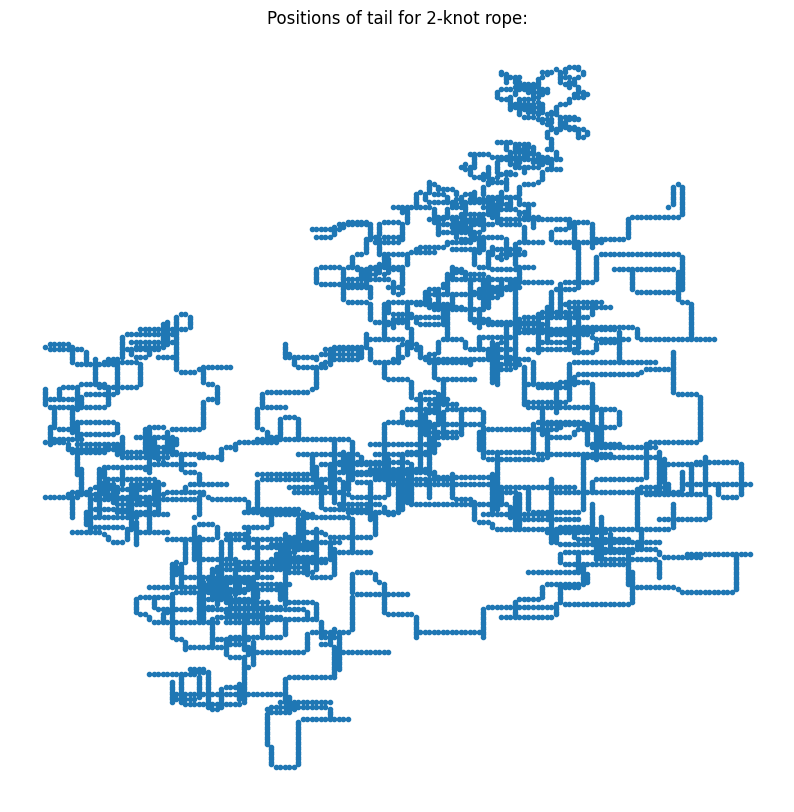

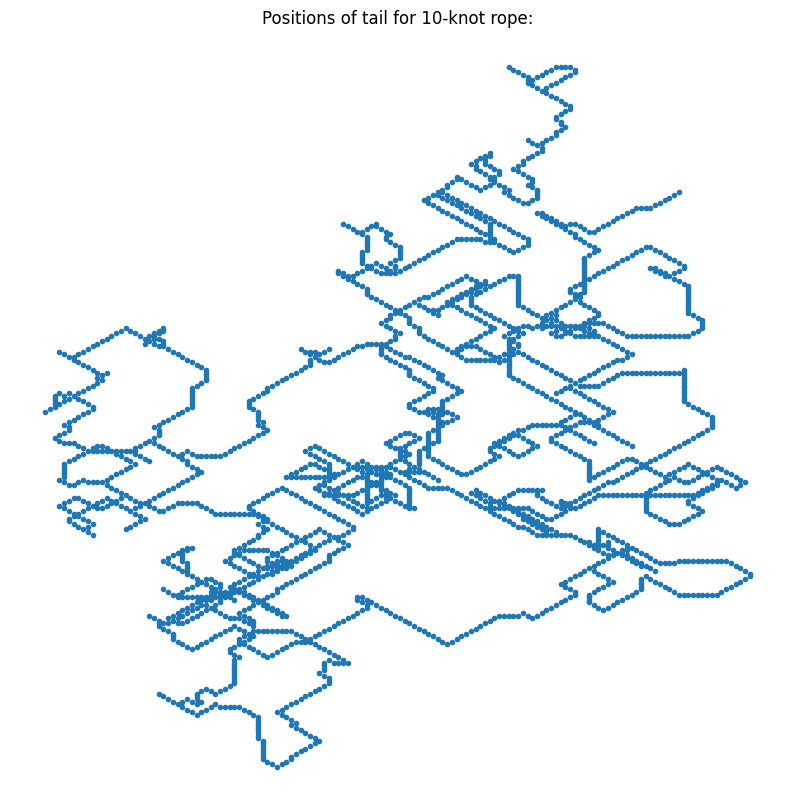

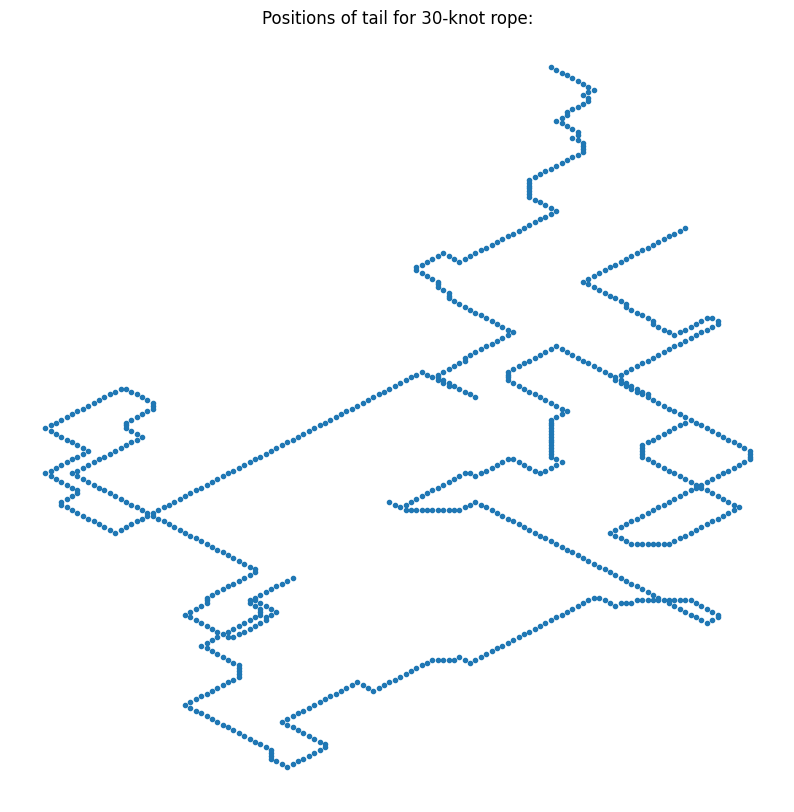

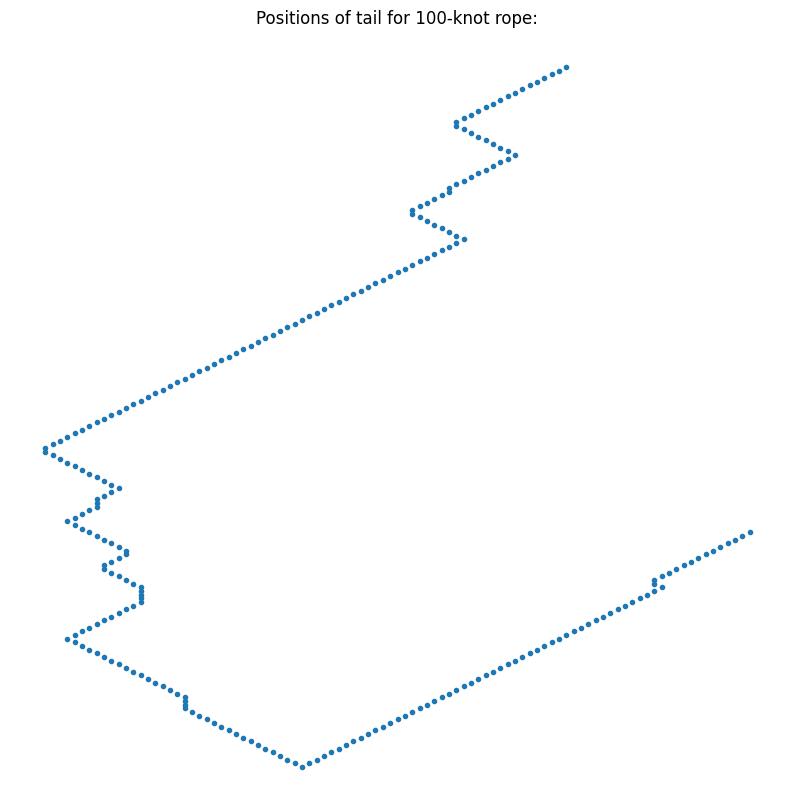

In [35]:
for k in (2, 10, 30, 100):
    naked_plot(move_rope(in9, knots=k), '.')
    plt.title(f'Positions of tail for {k}-knot rope:')

<img src="https://pbs.twimg.com/media/FjkFSH_XEAM5BRy?format=jpg&name=medium" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 10](https://adventofcode.com/2022/day/10): Cathode-Ray Tube 

**Today's input** is a program for a CPU that generates signals on a cathode-ray tube. Each line of the program has an opcode, either `noop` or `addx`, with the later followed by an integer argument. I can parse this with `atoms`:

In [36]:
in10 = parse(10, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 145 strs of size 4 to 8:
────────────────────────────────────────────────────────────────────────────────────────────────────
noop
noop
noop
addx 3
addx 7
noop
noop
noop
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 145 tuples of size 1 to 2:
────────────────────────────────────────────────────────────────────────────────────────────────────
('noop',)
('noop',)
('noop',)
('addx', 3)
('addx', 7)
('noop',)
('noop',)
('noop',)
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?

The instructions say "*Start by figuring out the signal being sent by the CPU. The CPU has a single register, `X`, which starts with the value 1. It supports only two instructions:*

- *`addx V` takes two cycles to complete. After two cycles, the `X` register is increased by the value `V`. (`V` can be negative.)*
- *`noop` takes one cycle to complete. It has no other effect.*

The **signal strength** is defined as "*the cycle number multiplied by the value of the X register.*" 

We're never sure what we will need in Part 2, so I'll make the program interpreter, `run`, be a generator that yields the value of `X` for every cycle (so for an `addx` instruction, the old value of X would be yielded twice).   For Part 1, we sum the product of cycle-number and `X` for cycles in {20, 60, 100, 140, 180, 220}:

In [37]:
def run(program) -> Iterable[tuple[int, int]]:
    """Execute the program, yielding the X register value on each cycle."""
    X = 1
    yield X
    for (op, *args) in program:
        if op == 'addx':
            yield X
            X += args[0]
        yield X

assert list(run(parse('noop \n addx 3 \n addx -5', atoms))) == [1, 1, 1, 4, 4, -1] # test

answer(10.1, 12560, lambda: 
       sum(c * X for c, X in enumerate(run(in10), 1) if c in range(20, 221, 40)))

Puzzle 10.1:     0.0 msec, correct answer: 12560          

<img src="https://pbs.twimg.com/media/FjpVRo4XEAIbTAY?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

### Part 2: Render the image given by your program. What eight capital letters appear on your CRT?

Part 2 says "*It seems like the X register controls the horizontal position of a sprite. Specifically, the sprite is 3 pixels wide, and the X register sets the horizontal position of the middle of that sprite. (In this system, there is no such thing as "vertical position": if the sprite's horizontal position puts its pixels where the CRT is currently drawing, then those pixels will be drawn.) You count the pixels on the CRT: 40 wide and 6 high. This CRT screen draws the top row of pixels left-to-right, then the row below that, and so on. The left-most pixel in each row is in position 0, and the right-most pixel in each row is in position 39.*"

I'm glad I decided to make my `run` function yields all the `X` values. I just need to map the cycle number to `(x, y)` positions on the screen (which `divmod` does), and plot the result. Then I'll use my eyeballs (not an OCR program) to determine what letters are indicated.

Puzzle 10.2:     2.4 msec, correct answer: PLPAFBCL       

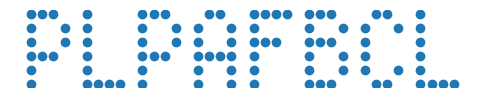

In [38]:
def render(program) -> None:
    """As the cycle number scans a 40-pixel wide CRT, turn on pixels
    where register X and the scan position differ by 1 or less."""
    points = []
    for (c, X) in enumerate(run(program)):
        y, x = divmod(c, 40)
        if abs(X - x) <= 1:
            points.append((x, y))
    naked_plot(points, size=(6, 1))
    
answer(10.2, "PLPAFBCL", lambda: 
       render(in10) or "PLPAFBCL")

# [Day 11](https://adventofcode.com/2022/day/11): Monkey in the Middle

**Today's input** is separated into paragraphs where each paragraph is a complex structure describing a monkey. The function `parse_monkey` will parse the paragraph into an instance of the class `Monkey`. I'll use a regular expression, but I'll keep it as simple as possible, so I don't have [**two problems**](http://regex.info/blog/2006-09-15/247). The `Monkey` class has seven fields; the regular expression has seven `groups`, each of which is just `(.+)`. Nothing fancy!

In [39]:
Monkey = namedtuple('Monkey', 'n, items, op, arg, test, t, f')

monkey_regex = """\
Monkey (.+):
  Starting items: (.+)
  Operation: new = old (.+) (.+)
  Test: divisible by (.+)
    If true: throw to monkey (.+)
    If false: throw to monkey (.+)"""

def parse_monkey(text) -> Monkey:
    """Parse a paragraph of text into a `Monkey`."""
    [(n, items, op, arg, test, t, f)] = re.findall(monkey_regex, text)
    return Monkey(int(n), ints(items), op, atom(arg), int(test), int(t), int(f))

in11 = parse(11, parse_monkey, paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 55 strs of size 0 to 48:
────────────────────────────────────────────────────────────────────────────────────────────────────
Monkey 0:
  Starting items: 98, 97, 98, 55, 56, 72
  Operation: new = old * 13
  Test: divisible by 11
    If true: throw to monkey 4
    If false: throw to monkey 7

Monkey 1:
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 8 Monkeys of size 7:
────────────────────────────────────────────────────────────────────────────────────────────────────
Monkey(n=0, items=(98, 97, 98, 55, 56, 72), op='*', arg=13, test=11, t=4, f=7)
Monkey(n=1, items=(73, 99, 55, 54, 88, 50, 55), op='+', arg=4, test=17, t=2, f=6)
Monkey(n=2, items=(67, 98), op='*', arg=11, test=5, t=6, f=5)
Monkey(n=3, items=(82, 91, 92, 53, 99), op='+', arg=8, test=13, t=1, f=2)
Monkey(n=4, items=(52, 62, 94, 96

### Part 1: What is the level of monkey business after 20 rounds of stuff-slinging simian shenanigans?

The instructions say: "*Each monkey has several attributes:*

- *Starting items: lists your worry level for each item the monkey is currently holding in the order they will be inspected.*
- *Operation: shows how your worry level changes as that monkey inspects an item. (An operation like new = old * 5 means that your worry level after the monkey inspected the item is five times whatever your worry level was before inspection.)*
- *Test: shows how the monkey uses your worry level to decide where to throw an item next.*
- *If true: shows what happens with an item if the Test was true.*
- *If false :shows what happens with an item if the Test was false.*

*After each monkey inspects an item but before it tests your worry level, your relief that the monkey's inspection didn't damage the item causes your worry level to be divided by three and rounded down to the nearest integer.*"

Following the instructions  requires careful attention, but is only a dozen lines or so. The **level of monkey business** is defined as the product of the number of items inspected by the two most active monkeys.

One thing to note: the monkeys will add and remove items from their purview, but my `Monkey` class is  immutable. That's a good thing! I don't want to mutate the monkey data structures, because then I would have to re-parse the input file if I wanted to run a computation again. So instead, my `inspect` function will keep track of which monkey has which items by using a dict, `items`, of `{monkey_number: [item,...]}`.

The function `inspect` counts the number of items each monkey inspects in the `inspected` Counter, and returns the Counter. Then the function `monkey_business` can pick out the two busiest monkeys to compute the puzzle's final answer.

In [40]:
def inspect(monkeys, rounds=1) -> Counter:
    """Simulate the monkeys doing inspections for `rounds`.
    Don't mutate monkeys. Return a Counter of items inspected by each monkey."""
    inspected = Counter()
    items = {monkey.n: list(monkey.items) for monkey in monkeys}
    for round in range(rounds):
        for monkey in monkeys:
            inspected[monkey.n] += len(items[monkey.n])
            for old in items[monkey.n]:
                arg = (old if monkey.arg == 'old' else monkey.arg)
                new = operators[monkey.op](old, arg) // 3
                throw = (monkey.t if (new % monkey.test == 0) else monkey.f)
                items[throw].append(new)
            items[monkey.n] = []    
    return inspected

operators = {'+': operator.add, '*': operator.mul, '-': operator.sub}

def monkey_business(inspected) -> int:
    """The product of the number of inspections by the two most active monkeys."""
    return prod(sorted(inspected.values())[-2:])

answer(11.1, 54036, lambda: 
       monkey_business(inspect(in11, 20)))

Puzzle 11.1:     0.2 msec, correct answer: 54036          

### Part 2: Worry levels are no longer divided by three after each item is inspected; you'll need to find another way to keep your worry levels manageable. Starting again from the initial state in your puzzle input, what is the level of monkey business after 10000 rounds?

The puzzle instructions are warning me that worry levels will be so high that they are unmanageable. Did they mean too high for a 64-bit int, or too high even for a language like Python with arbitrary-length integers? I ran `inspect` for 200 rounds and found the largest worry level was over a **million digits**. I don't think a run for 10,000 rounds is feasible.

"No problem!," I thought to myself; since each monkey uses the worry level for one purpose only–to see if it is divisible by their test number–we should be able to compute with the worry level modulo the test number. I tried that, but AoC told me I had the wrong answer.

So I thought again. The **bug** was that items with their worry levels get passed from one monkey to the next, and the next monkey will have a different test number, and should be dealing with worry levels modulo *that* test number. So I need to be working with worry levels modulo the product of *all* the monkeys' test numbers; I call this product `m`. (I could use the least common multiple, but product works fine, and `math.lcm` with multiple arguments only appears in Python 3.9.) My revision of`inspect` is backwards compatible, does all worry computations modulo `m`, and takes an optional argument, the `relief` factor, which by default causes worry levels to be divided by 3 (for Part 1), but you can specify `relief=1` for Part 2. 

In [41]:
def inspect(monkeys, rounds, relief=3) -> Counter:
    """Simulate the monkeys doing inspections for `rounds`.
    Don't mutate monkeys. Return a Counter of items inspected by each monkey.
    Compute worry levels modulo the product of all the monkeys' test numbers."""
    inspected = Counter()
    items = {monkey.n: list(monkey.items) for monkey in monkeys}
    m = prod(monkey.test for monkey in monkeys)
    for round in range(rounds):
        for monkey in monkeys:
            inspected[monkey.n] += len(items[monkey.n])
            for old in items[monkey.n]:
                arg = (old if monkey.arg == 'old' else monkey.arg)
                new = (operators[monkey.op](old, arg) % m) // relief
                throw = (monkey.t if (new % monkey.test == 0) else monkey.f)
                items[throw].append(new)
            items[monkey.n] = []    
    return inspected

answer(11.1, 54036, lambda: 
       monkey_business(inspect(in11, 20)))

Puzzle 11.1:     0.2 msec, correct answer: 54036          

In [42]:
answer(11.2, 13237873355, lambda: 
       monkey_business(inspect(in11, 10_000, relief=1)))

Puzzle 11.2:    91.4 msec, correct answer: 13237873355    

<img src="https://pbs.twimg.com/media/FjuIVZcXEAAEDvl?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 12](https://adventofcode.com/2022/day/12): Hill Climbing Algorithm

**Today's input** is a grid of heights, from `'a'` (low) to `'z'` (high), with two special heights, `'S'` for the start location (the lowest) and `'E'` for the end location (the highest height, with the best signal reception). 

In [43]:
def hill_height(line, heights='SabcdefghijklmnopqrstuvwxyzE') -> tuple[int]: 
    """Translate each letter in `line` into a height from 0 to 27."""
    return mapt(heights.index, line)

in12 = parse(12, hill_height)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 41 strs of size 77:
────────────────────────────────────────────────────────────────────────────────────────────────────
abccccccccaaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccccccccccccccccccccccaaaaaa
abccccccccaaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccccccccccccccccccccccaaaaaa
abccccccccccaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccacccccccccccccccccccaaaaa
abcccccaaaacaaaaaaccaaaaaaaaaaaaaaaaacccccccccccccccaaaccccaccccccccccccccaaa
abccccaaaaacaaccccccaaaaaacaaacaacaaaaaaacccccccccccaaaacccaacccccccccccccaaa
abaaccaaaaaaccccaaacaaaacacaaacaaccaaaaaacccccccccccaklaccccccccccccccccccaac
abaaccaaaaaaccaaaaaacccccccaaacccaaaaaaaccccccccccckkkllllccccccccccccccccccc
abaaccaaaaaaccaaaaaacccccccaaaaacaaaaaaacccccccccckkkklllllcccccccaaaccaccccc
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 41 tuples 

### Part 1: What is the fewest steps required to move from your current position to the location that should get the best signal?

The function `hill_climb` will pick out the initial and goal locations and call `A_star_search`. This isn't a generic `GridProblem` though, because we can't transition to *any* neighbor, only to the ones that are no more than one unit higher. As the instructions state it: "*During each step, you can move exactly one square up, down, left, or right. To avoid needing to get out your climbing gear, the elevation of the destination square can be at most one higher than the elevation of your current square; that is, if your current elevation is m, you could step to elevation n, but not to elevation o. (This also means that the elevation of the destination square can be much lower than the elevation of your current square.)*"

The class `HillClimbProblem` imposes that constraint on movement:

In [44]:
def hill_climb(grid) -> Node:
    """Find the initial and goal locations in grid, and return a least-cost path."""
    initial = the(loc for loc in grid if grid[loc] == 0)
    goal    = the(loc for loc in grid if grid[loc] == 27)
    return A_star_search(HillClimbProblem(initial, goal, grid=grid))

class HillClimbProblem(GridProblem):
    """A GridProblem where you can't climb upward more than one height amount per step."""
    
    def actions(self, loc):
        """All neighboring squares that are no more than one unit higher."""
        grid = self.grid
        return [p for p in grid.neighbors(loc) if grid[p] <= grid[loc] + 1]
    
answer(12.1, 394, lambda: 
       hill_climb(Grid(in12)).path_cost)

Puzzle 12.1:     9.8 msec, correct answer: 394            

#### Part 2: What is the fewest steps required to move starting from any square with elevation *a* to the location that should get the best signal?

Part 2 asks what the shortest path would be if we could start at any location with height 1 (represented by an `'a'` in the input). I could repeat the search for each such location. How many locations would that be?

In [45]:
append(in12).count(1)

930

Almost a thousand locations; so the search would take about 30 seconds. [Who's got that kind of time?](https://www.gocomics.com/calvinandhobbes/1995/08/17) Instead I'll invent yet another `SearchProblem` subclass, `HillClimbProblem2`, which starts at a dummy state that is off the grid, and can transition with zero cost from that state to any location with height 1:

In [46]:
off_grid = (-1, -1) # A dummy location that is not on grid

def hill_climb2(grid) -> Node:
    goal = the(loc for loc in grid if grid[loc] == 27)
    return A_star_search(HillClimbProblem2(off_grid, goal, grid=grid))

class HillClimbProblem2(GridProblem):
    """Like HillClimbProblem, but with a free pass to any location with height 1."""
    
    def action_cost(self, s1, a, s2): return 0 if s1 == off_grid else 1
    
    def actions(self, loc):
        grid = self.grid
        if loc == off_grid:
            return [p for p in grid if grid[p] == 1] # Go to any location with height `a` = 1
        else:
            return [p for p in grid.neighbors(loc) if grid[p] <= grid[loc] + 1]
        
answer(12.2, 388, lambda: 
       hill_climb2(Grid(in12)).path_cost)

Puzzle 12.2:    11.2 msec, correct answer: 388            

Great! That's a thousand-fold speedup over the naive approach. And it gives the correct answer.

<img src="https://pbs.twimg.com/media/FjzvfwfXEB4Pnuc?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

### Part 3: Exploration

I'm interested in seeing what the landscape looks like. In the plot below greener is higher elevation; the path is in red:

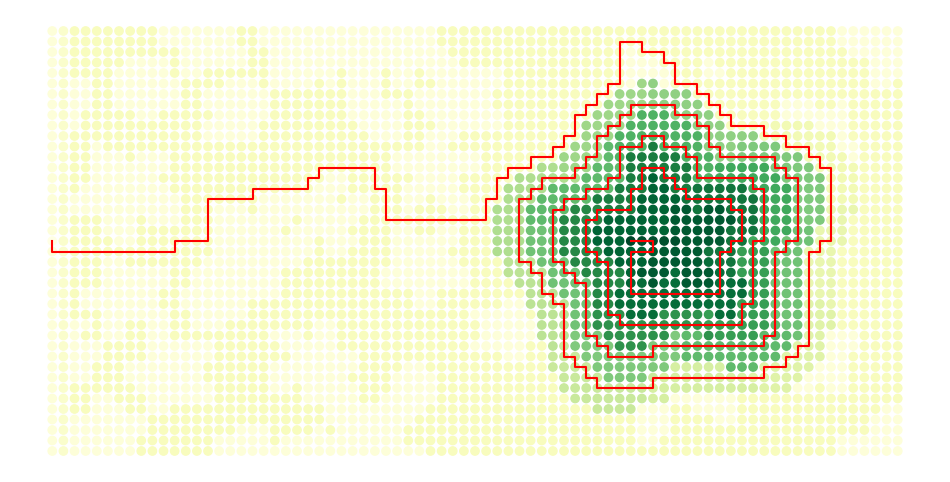

In [47]:
grid = Grid(in12)
naked_plot(path_states(hill_climb(grid)), 'r-', size=(12, 6))
plt.scatter(*T(grid), c=list(grid.values()), cmap='YlGn');

# [Day 13](https://adventofcode.com/2022/day/13): Distress Signal


**Today's input** is divided into paragraphs, where each paragraph consists of two *packets* from the handheld device. A packet is a nested list structure, with integer leaf values. The format is the same as Python lists, so I could parse them with `eval`, but the safe alternative is to use `ast.literal_eval`, just in case the input contains  `__import__('os').system('rm -rf *')`.

In [48]:
in13 = parse(13, lambda par: parse(par, ast.literal_eval), paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 449 strs of size 0 to 289:
────────────────────────────────────────────────────────────────────────────────────────────────────
[[[[],[7,10,6,5],[],[8]],0,1,[[8,10]],4],[[[4,0,3,2,0]],7],[[],3,[[0,2],8,5],[],[[2,10,4,6]]],[3 ...
[[0,2,7],[],[10,[[0,7,3,6]]],[2,[8],3]]

[[],[[0,8,[],[0,8,6,7,10]],4,10,[[],9,[1],4,10],3],[[7,1,0],10,[[1,10,7,8],[3,7],[3,6],5],1,0],[ ...
[[[],0,[[4,5,10],8]],[0,5],[[[1,8,8,8],2],0,[7,9],3]]

[[3,[[10,2,8],3,0,[2,1],7]],[[[1,9,5,5,8],1,9,[9,2,4,5]],2,1,[[],[4,3],3]],[],[7,[6,4,[7,0,5]],[ ...
[[3],[],[[4,4],[[5,4,3],10,[1,3,9],9],3,1],[6,[0,[9,0,1,1,1]]],[]]
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 150 tuples of size 2:
────────────────────────────────────────────────────────────────────────────────────────────────────
([[[[], [7, 10, 6, 5], [], [8]], 0, 1,

### Part 1: Determine which pairs of packets are already in the right order. What is the sum of the indices of those pairs?

The instructions define **right order** as follows:

*When comparing two values, the first value is called left and the second value is called right. Then:*

- *If both values are integers, the lower integer should come first. If the left integer is lower than the right integer, the inputs are in the right order. If the left integer is higher than the right integer, the inputs are not in the right order. Otherwise, the inputs are the same integer; continue checking the next part of the input.*
- *If both values are lists, compare the first value of each list, then the second value, and so on. If the left list runs out of items first, the inputs are in the right order. If the right list runs out of items first, the inputs are not in the right order. If the lists are the same length and no comparison makes a decision about the order, continue checking the next part of the input.*
- *If exactly one value is an integer, convert the integer to a list which contains that integer as its only value, then retry the comparison. For example, if comparing [0,0,0] and 2, convert the right value to [2] (a list containing 2); the result is then found by instead comparing [0,0,0] and [2].*

I was confused for a while because the rules don't say whether two identical lists are in the right order or not; the rules just say you should "continue checking." I decided that I should implement the Boolean truth predicate `right_order` in terms of a *ternary* comparison function, `compare`. By convention, a Python comparison function, `compare(left, right)`, returns a negative number if `left < right`, zero if they are equal, and a positive number if `left > right`. I'll implement that:

In [49]:
def right_order(packets) -> bool:
    """Are the two packets in the right order?"""
    return compare(*packets) <= 0
    
def compare(left, right) -> int:
    """Compare two packets' ordering. Negative for right order; 0 for equal; positive for wrong."""
    types = (type(left), type(right))
    if   types == (int,  int):  return left - right
    elif types == (int,  list): return compare([left], right)
    elif types == (list, int):  return compare(left, [right])
    elif types == (list, list): return first_true(map(compare, left, right)) or len(left) - len(right)

The call to `first_true` (defined in my [AdventUtils](AdventUtils.ipynb)) says to `compare` respective successive elements of the two lists one by one, and to return the first truthy (i.e. non-zero) comparison. If either list is exhausted,  return the  comparison of the list lengths. 

> *Note*: I'm beginning to catch on to some of the strategies that [Eric Wastl](http://was.tl/) might use to make a unique puzzle variation for each participant, yet limit the amount of computation required on his end. For this puzzle, it could be that everybody gets the same pairs of packets, but in permuted order. Thus, everybody's sum of indices will be different (so you can't cheat by submitting your friend's answer), but Eric doesn't have to generate different random packets and determine their order for every participant; he just needs to add up different indices.

I wrote some test cases to gain some confidence that I got it right: 

In [50]:
assert compare(3, [3]) == 0
assert compare([1,1,3,1,1], [1,1,5,1,1]) < 0
assert compare([[1],[2,3,4]], [[1],4]) < 0
assert compare([7,7,7,7], [7,7,7]) > 0  
assert compare([1,[2,[3,[4,[5,6,7]]]],8,9], [1,[2,[3,[4,[5,6,0]]]],8,9]) > 0
assert compare([1,2,3], [1,2,3]) == 0

At this point I'm ready to compute the answer, and was happy to see it worked the first time:

In [51]:
answer(13.1, 5882, lambda: 
       sum(i for (i, packets) in enumerate(in13, 1) if right_order(packets)))

Puzzle 13.1:     0.2 msec, correct answer: 5882           

### Part 2: Organize all of the packets into the correct order. What is the decoder key for the distress signal?

The puzzle is asking us to:
- Take all the packets and throw in two divider packets, `[[2]]` and `[[6]]`.
- Sort the packets.
- Find the 1-based indexes of the two divider packets and multiply the indexes together.
- That's the decoder key; submit it.

I foolishly tried to call the built-in `sorted` function with `key=compare`; that's a **bug**;  `compare` (or `right_order` for that matter) is not a `key` function (of one argument), it is a comparison function (of two arguments).

In Python 2, the `sorted` function accepted a two-argument `cmp` function, but in Python 3 that functionality is gone. I had to look it up to find that the `functools.cmp_to_key` function converts a comparison function to a key function. 

In [52]:
def decode(packets, dividers=[[[2]],[[6]]]):
    """Sort the packets and the dividers, and return their product of the indices of the dividers."""
    ordered = sorted(append(packets) + dividers, key=functools.cmp_to_key(compare))
    return prod(ordered.index(d) + 1 for d in dividers)
    
answer(13.2, 24948, lambda: 
       decode(in13))

Puzzle 13.2:     2.5 msec, correct answer: 24948          

# [Day 14](https://adventofcode.com/2022/day/14): Regolith Reservoir

> *Note*: I happen to know that *regolith* is loose dust on the surface of a planet; the Apollo astronauts refered to the lunar regolith. I'm not sure if that will help with today's puzzle.

Each line of **today's input** is a sequence of (x, y) points, representing the vertices of a zig-zag path:

In [53]:
in14 = parse(14, lambda line: mapt(ints, line.split('->')))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 163 strs of size 16 to 296:
────────────────────────────────────────────────────────────────────────────────────────────────────
494,71 -> 498,71
490,23 -> 490,17 -> 490,23 -> 492,23 -> 492,18 -> 492,23 -> 494,23 -> 494,16 -> 494,23 -> 496,23 ...
472,131 -> 472,134 -> 466,134 -> 466,141 -> 484,141 -> 484,134 -> 476,134 -> 476,131
490,23 -> 490,17 -> 490,23 -> 492,23 -> 492,18 -> 492,23 -> 494,23 -> 494,16 -> 494,23 -> 496,23 ...
478,104 -> 478,103 -> 478,104 -> 480,104 -> 480,96 -> 480,104 -> 482,104 -> 482,97 -> 482,104 -> ...
469,53 -> 474,53
465,91 -> 465,90 -> 465,91 -> 467,91 -> 467,84 -> 467,91 -> 469,91 -> 469,85 -> 469,91 -> 471,91 ...
499,38 -> 503,38
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 163 tuples of size 2 to 30:
──────────────────────────────────────────────────────────

### Part 1: How many units of sand come to rest before sand starts flowing into the abyss below?

The paths in the input represent connected paths of solid rock in a vertical slice of a cave. Sand particles fall into the cave, pile up and fall off of the rocks, and eventually reach the bottom. A sand particle enters the cave from the point (500, 0) and at each time step prefers to go straight downwards (South on our grid) from its current location, but if that location is occupied (by rock or sand) it will go diagonally Southwest, and if that is occupied, Southeast. If all three are occupied, it stops, and  the next particle enters. The simulation continues until one particle falls off the bottom. At that point, we return the number of particles that have come to rest (not counting the one that fell off the bottom).

I'll just return the number of time steps from `simulate_sand`, but because Part 2 might want some more information, I'll have my `simulate_sand` function accept a grid as input and mutate the grid. Perhaps in Part 2 we'll want to take a look at how the grid was modified.

In [54]:
def put_paths(grid, paths) -> Grid:
    "Place the paths of rock onto the grid."
    for path in paths:
        for ((x0, y0), (x1, y1)) in sliding_window(path, 2):
            for p in cross_product(cover(x0, x1), cover(y0, y1)):
                grid[p] = '#'
    return grid

def simulate_sand(grid, paths, entry=(500, 0)) -> int:
    """Simulate falling sand until one particle falls off the bottom; return number of time steps."""
    put_paths(grid, paths)
    bottom  = max(map(Y_, grid)) # The bottom-most piece of rock
    falling = [South, add2(South, West), add2(South, East)] # The directions sand can fall
    for particles in count_from(1):
        loc = entry # A new sand particle enters
        while True: # ... and falls
            points = [add2(loc, dir) for dir in falling]
            loc2 = first((p for p in points if p not in grid), default=loc)
            if loc == loc2: # Sand comes to rest
                grid[loc] = 'o'
                break
            elif Y_(loc) > bottom: # Sand falls into endless void
                return particles - 1 # Don't count the one that fell
            loc = loc2

answer(14.1, 728, lambda: 
       simulate_sand(Grid(), in14))

Puzzle 14.1:    30.6 msec, correct answer: 728            

I'm ashamed to say the first time I ran this, I got an infinite loop; I had neglected to include the `loc = loc2` line at the end of the function. I knew I had to do that; I just forgot. And I guess I prefer to think functionally, not in terms of updates, so I messed up. After correcting for that, I had an off-by-one error, because I misread the instructions and thought the last unit of sand, which falls into the void, should be counted, but it should not.

### Part 2: Using your scan, simulate the falling sand until the source of the sand becomes blocked. How many units of sand come to rest?

In Part 2, the sand no longer falls off the bottom; instead there is a *floor* at the bottom of the cave (specified as 2 units below the deepest known rock path). Since the [angle of repose](https://en.wikipedia.org/wiki/Angle_of_repose) of the sand is 45°, we need to make the floor wide enough to cover that (and throw in a bit extra to make sure; I added "2" to the `dx` variable, which tells how far away from the entry point the floor needs to extend). Eventually the sand will back up and cover the entry point; that's a second way to end the simulation.

I'll re-write `simulate_sand` so that it handles both ways to end the simulation. If you want the Part 1 way, specify `floor=None` (the default); this means there is no floor. If you want the Part 2 way, specify, say, `floor=2` to put the floor two units below the lowest rock.

In [55]:
def simulate_sand(grid, paths, entry=(500, 0), floor=None) -> int:
    """Simulate falling sand until either one particle falls off the bottom,
    or the entry point is blocked. Either way, return number of time steps."""
    put_paths(grid, paths)
    Ymax = max(Ys(grid))
    falling = [South, add2(South, West), add2(South, East)] # The directions sand can fall
    if floor: # put down a floor path that is wide enough to catch anything from the entry
        x, dx = X_(entry), Ymax + 2
        Ymax += floor
        put_paths(grid, [[(x - dx, Ymax), (x + dx, Ymax)]])  
    for particles in count_from(1):
        loc = entry # A new sand particle enters
        while True: # The sand particle falls
            points = [add2(loc, dir) for dir in falling]
            loc2 = first((p for p in points if p not in grid), default=loc)
            if loc2 == entry: # Stop if the entry point is blocked
                return particles
            if loc == loc2: # Sand comes to rest
                grid[loc2] = 'o'
                break
            elif Y_(loc2) > Ymax: # Sand falls into endless void
                grid[loc2] = 'o'
                return particles - 1
            loc = loc2
            
answer(14.1,   728, lambda: 
       simulate_sand(Grid(), in14))

Puzzle 14.1:    31.8 msec, correct answer: 728            

In [56]:
answer(14.2, 27623, lambda: 
       simulate_sand(Grid(), in14, floor=2))

Puzzle 14.2: 1,465.4 msec, correct answer: 27623          

Uh, oh! Up to now my solutions have all run in well under a second, but this one takes longer. I hope the coming days don't continue this trend.

### Part 3: Exploration

Let's get a picture of the rock paths and the accumulated sand. (I didn't need access to the grid for Part 2, but now I'm glad to have it).

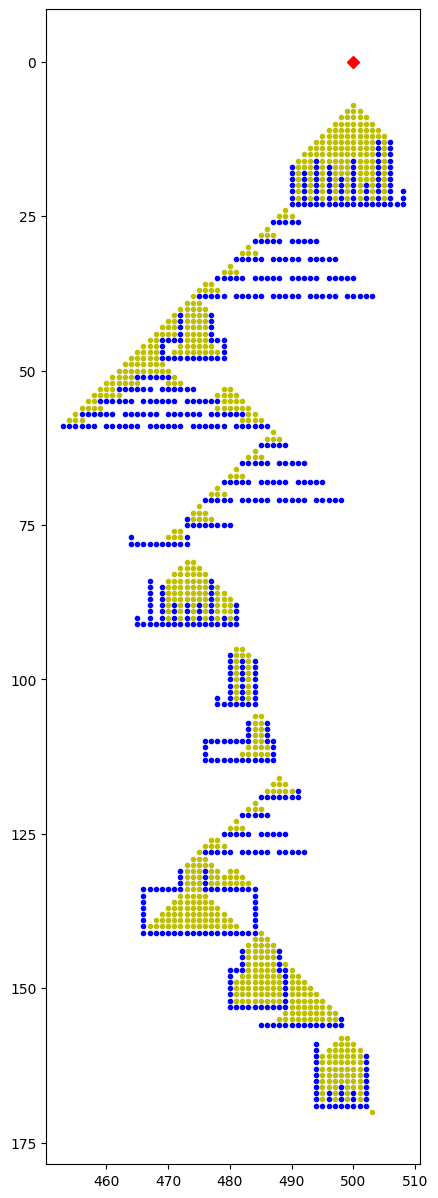

In [57]:
markers = {'+': 'rD', 'o': 'y.', '#': 'b.'}
grid = Grid({(500, 0): '+'})
simulate_sand(grid, in14)
grid.plot(markers, figsize=(5, 15)); plt.axis('scaled');

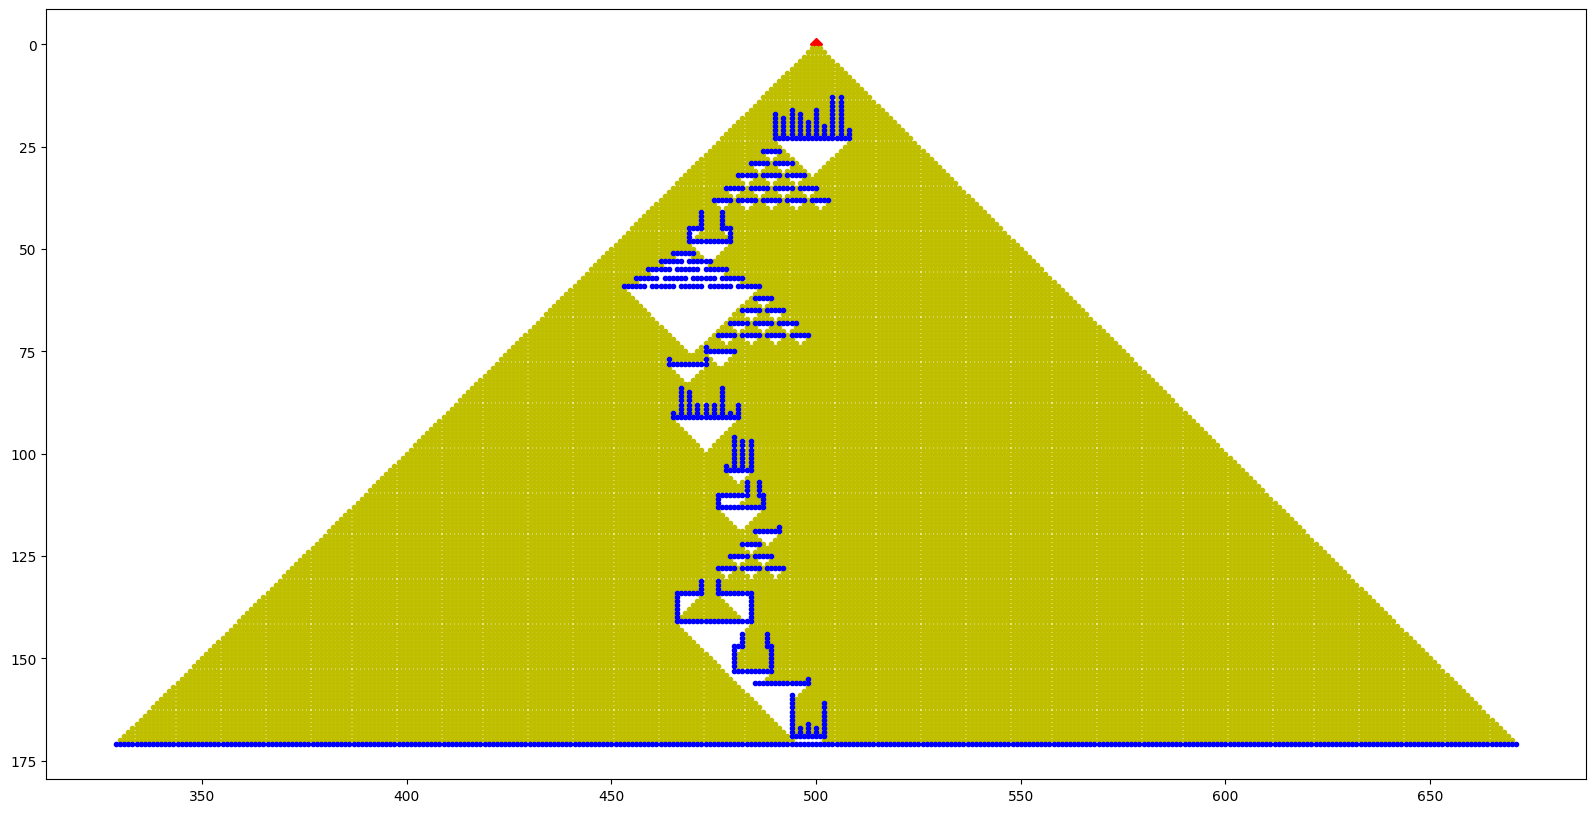

In [58]:
grid2 = Grid({(500, 0): '+'})
simulate_sand(grid2, in14, floor=2)
grid2.plot(markers, figsize=(20, 10)); plt.axis('scaled');

<img src="https://pbs.twimg.com/media/Fj9sYEqXoAMOnPE?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 15](https://adventofcode.com/2022/day/15): Beacon Exclusion Zone

**Today's input** is a sequence of lines, each of which has the (x, y) coordinates of a **sensor**, followed by the (x, y) coordinates of the **beacon** that is closest to the sensor in Manhattan distance (which I name `taxi_distance` because it is shorter and less prone to spelling errors):

In [59]:
in15 = parse(15, lambda line: mapt(ints, line.split(':')))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 26 strs of size 68 to 73:
────────────────────────────────────────────────────────────────────────────────────────────────────
Sensor at x=3890859, y=2762958: closest beacon is at x=4037927, y=2985317
Sensor at x=671793, y=1531646: closest beacon is at x=351996, y=1184837
Sensor at x=3699203, y=3052069: closest beacon is at x=4037927, y=2985317
Sensor at x=3969720, y=629205: closest beacon is at x=4285415, y=81270
Sensor at x=41343, y=57178: closest beacon is at x=351996, y=1184837
Sensor at x=2135702, y=1658955: closest beacon is at x=1295288, y=2000000
Sensor at x=24022, y=1500343: closest beacon is at x=351996, y=1184837
Sensor at x=3040604, y=3457552: closest beacon is at x=2994959, y=4070511
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 26 tuples of size 2:
────────────────────────────

I note that many of the coordinates are 7-digit numbers. I may have to be careful to come up with efficient solutions.

### Part 1: Consult the report from the sensors you just deployed. In the row where y=2000000, how many positions cannot contain a beacon?

When a sensor reports a certain beacon is closest, it means that closer locations cannot contain beacons (and it is also guaranteed that no sensor will be equally close). For Part 1 we're asked how many locations on the line y=2,000,000 are excluded from containing a beacon. We'll answer that by first deciding what range of *x* coordinates on the line are excluded by a single sensor (with the function `exclusion`), then using `count_exclusions` to add them up, while noting that a location that actually contains a beacon is not excluded from having one. I'll probably regret this in part 2, but I decided to count exclusions by enumerating sets of *x* coordinates, taking their union, and doing a set difference with the set of beacon *x* coordinates. That seemed the least error-prone way to proceed.

In [60]:
def exclusion(sensor, beacon, yline) -> range:
    """Given a `sensor` and its closest `beacon`, what is the range of x coordinates 
    of points on line y that are excluded from having another beacon?
    (If `beacon` happens to be on line y, count it as excluded; we'll account for that elsewhere.)"""
    d = taxi_distance(sensor, beacon)
    dy = abs(Y_(sensor) - yline)
    if dy > d:
        return range(-1, -1) # empty range
    else:
        dx = d - dy
        return range(X_(sensor) - dx, X_(sensor) + dx + 1)
    
def count_exclusions(sb_pairs, yline):
    """How many points on the y-line are excluded from having beacons?
    Don't count the location of a beacon as being excluded."""
    y_excluded = union(exclusion(s, b, yline) for s, b in sb_pairs)
    y_beacons = {x for s, (x, y) in sb_pairs if y == yline}
    return len(y_excluded - y_beacons)

In [61]:
answer(15.1, 4502208, lambda: 
       count_exclusions(in15, 2_000_000))

Puzzle 15.1:   152.1 msec, correct answer: 4502208        

### Part 2: Find the only possible position for the distress beacon. What is its tuning frequency?

For Part 2, we are told there is only one possible position in a 4 million x 4 million square that could contain the missing distress beacon.  Given a point, the tuning frequency "*can be found by multiplying its x coordinate by 4000000 and then adding its y coordinate*."

Using brute force on 16 trillion locations would be slow; I'd like to find a better way. Can I limit the positions that I have to test to be some subset of the 4 million x 4 million square? 

I had an initial idea: each sensor's square divides the plane into five parts: the interior, which is excluded, and 4 half-planes on each side, which could be recursively checked for exclusion by another sensor. However, to do this cleanly I'd need to deal with 45-degree lines, not axis-aligned lines. That seems complicated.

Then I had an insight: if there is only one possible position, it must be surrounded on all sides by *impossible* positions. That is, it must be one farther away than excluded positions, in every direction. Saying "it must be one farther away" is the same as saying it must be on the **perimeter** of a diamond shape that is one larger than the sensor-beacon distance, for several sensor-beacon pairs. 

So my strategy to find the one possible position of the distress beacon (in the function `distress_beacon_location`) is:
- First generate all the points on all the "perimeters" of all the beacons (using the `perimeter` function).
- Then find one of the points that is not excluded by some sensor-beacon pair (using the `excluded` function).
- Given the non-excluded point, calculate the tuning frequency (using the `tuning_frequency` function).

In [62]:
def distress_beacon_location(sb_pairs, maxi=4_000_000) -> Point:
    """The one location that is not excluded."""
    return first(point for s, b in sb_pairs
                 for point in perimeter(s, b)
                 if not excluded(point, sb_pairs, maxi))

def perimeter(sensor, beacon) -> Iterable[Point]:
    """The points that are one farther away from sensor than beacon is."""
    D = taxi_distance(sensor, beacon) + 1 # One unit more than the sensor-beacon distance
    point = add2(sensor, (0, -D))        # Start D units north of the sensor.
    # One at a time, trace D points stepping in each of the four diagonal directions.
    for dir in (SE, SW, NW, NE):
        for _ in range(D):
            point = add2(point, dir)
            yield point
            
def excluded(point, sb_pairs, maxi=4_000_000) -> bool:
    """Is the point excluded by one of the (sensor, beacon) pairs?
    Either closer to the sensor than its beacon, or outside the range of allowable points?"""
    return (min(point) < 0 or max(point) > maxi or
            any(taxi_distance(s, point) <= taxi_distance(s, b)
                for s, b in sb_pairs))

def tuning_frequency(point) -> int: return 4_000_000 * X_(point) + Y_(point)

Here's the answer (which took a lot more run time than previous puzzles, but still well under a minute):

In [63]:
answer(15.2, 13784551204480, lambda: 
       tuning_frequency(distress_beacon_location(in15)))

Puzzle 15.2: 8,796.6 msec, correct answer: 13784551204480 

*Note*: Initially I had a **bug** where I had used `<` instead of `<=` for the distance comparison in `excluded`. (I guess when I read the instruction "*There is never a tie where two beacons are the same distance to a sensor*" in Part 1, I took that as meaning "*don't worry about ties*" when I should have taken it as "*one important way a point can be excluded is to be the same distance to a sensor.*") 

### Part 3: Exploration

In uncovering the bug I wrote some tests, and a visualization for the perimeter:

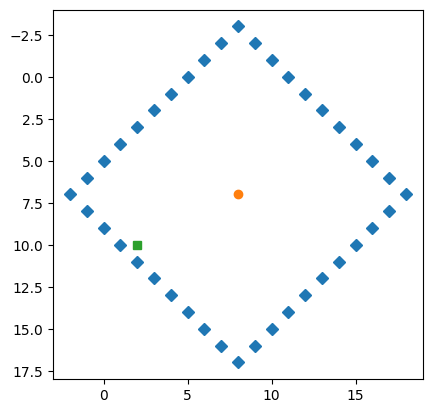

In [64]:
s, b = ((8, 7), (2, 10))

assert taxi_distance(s, b) == 9
assert exclusion(s, b, 10) == range(2, 15)
assert exclusion(s, b, 11) == range(3, 14)
assert count_exclusions([(s, b)], 10) == 12
assert not exclusion(s, b, -3)
assert excluded((3, 11), [(s, b)], 20)
assert not excluded((3, 12), [(s, b)], 20)

assert set(perimeter((0, 0), (0, 1))) == {
    (-2, 0), (-1, -1), (-1, 1), (0, -2), (0, 2), (1, -1), (1, 1), (2, 0)}

for p in perimeter(s, b):
    assert taxi_distance(s, p) == taxi_distance(s, b) + 1
        
def plot_perimeter(s, b):
    """Plot sensor and beacon as circle and square; perimeter as diamonds."""
    plt.plot(*T(perimeter(s, b)), 'D')
    plt.plot(*T([s]), 'o')
    plt.plot(*T([b]), 's')
    plt.axis('square'); plt.gca().invert_yaxis()
    
plot_perimeter(s, b)

# [Day 16](https://adventofcode.com/2022/day/16): Proboscidea Volcanium

**Today's input** consists of lines that each describe a valve in a room in a cave, giving the valve's name, flow rate, and neighboring valves. We will parse each line into a 3-tuple:

In [65]:
def parse_valve(line: str) -> tuple[str, int, tuple[str, ...]]:
    """Find the (valve name, flow rate, neighbors) in the line of text."""
    tokens = atoms(line)
    return (tokens[1], tokens[5], tokens[10:])

in16 = parse(16, parse_valve)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 56 strs of size 51 to 68:
────────────────────────────────────────────────────────────────────────────────────────────────────
Valve AA has flow rate=0; tunnels lead to valves RZ, QQ, FH, IM, VJ
Valve FE has flow rate=0; tunnels lead to valves TM, TR
Valve QZ has flow rate=19; tunnels lead to valves HH, OY
Valve TU has flow rate=17; tunnels lead to valves NJ, IN, WN
Valve RG has flow rate=0; tunnels lead to valves IK, SZ
Valve TM has flow rate=0; tunnels lead to valves FE, JH
Valve JH has flow rate=4; tunnels lead to valves NW, QQ, TM, VH, AZ
Valve NW has flow rate=0; tunnels lead to valves JH, OB
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 56 tuples of size 3:
────────────────────────────────────────────────────────────────────────────────────────────────────
('AA', 0, ('RZ', 'QQ', 'FH',

### Part 1: Work out the steps to release the most pressure in 30 minutes. What is the most pressure you can release?

You can move from one room to a neighboring room in one minute. Once in a room, you can open that room's valve in one minute. For all subsequent minutes, that valve will put out its flow rate worth of pressure. We're asked to maximize the total pressure, which is the sum of the product of each open valve's flow rate times the number of minutes the valve is open. For example, if you open up a valve with flow rate 10 with 27 minutes remaining, and one with flow rate 13 with 10 minutes remaining, that generates 270 + 130 = 400 units of pressure.

***Conceptually*** this is a simple search problem: we move from room to room for 30 minutes, opening valves as we go, trying to find the sequence of actions that maximizes the total flow.

***Practically***, I'm concerned about the size of the search state space. With 30 minutes, 56 rooms, and 56 valves that can be either open or not, there are 30 × 56 × 2<sup>56</sup> ≈ 10<sup>20</sup> states to consider. We're going to need some way of  directing the search. 

The first thing I thought of is that the only useful actions are opening **non-zero-flow** valves. There is no reason to go to a zero-flow-valve room, except to pass through on the way to another room. So I can deal with **compound actions** such as "*go from room A through rooms B and C and then to D and open the non-zero-flow valve there*" (an action that takes four minutes to complete: three to move and one to open). 

Let's see how many rooms have a positive flow rate, and how many are zero:

In [66]:
Counter(flow > 0 for _, flow, _ in in16)

Counter({False: 41, True: 15})

Great, **only 15 rooms to worry about!** Now we're down to 30 × 15 × 2<sup>15</sup> ≈ 10<sup>7</sup> states–manageable!  We still need to figure out the costs (in minutes) of our compound actions. I remember that the [Floyd-Somebody](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm) algorithm computes the shortest distance between all pairs of nodes in a graph. So now I have a plan:
- Use the `floyd` algorithm to compute the costs (travel time in minutes) between each pair of rooms.
- Define the function `costs_and_flows` to give us the costs and also a dict of `{room: flow_rate}` for just the rooms with non-zero flow rate (plus the start room).
- Do a depth-first search with `valve_search`. 
- (I could have made this work with my A* search function, but I felt it wasn't a good match for this problem for several reasons: I don't have a good heuristic function; we're trying to maximize flow, not minimize path cost; the "action cost" depends on what time the action is taken; and we have two "costs", flow and minutes, to deal with.) 
- My `valve_search` works as follows:
    - We try to maximize the flow from the current room plus the flow from the best path that continues from the current room/valve. This total is `flow1 + flow2`. 
    - We'll keep track of the set of valves that have already been opened so we never open one twice.
    - We'll keep track of the time remaining and stop when we run out of time.
    - We'll also stop when there are no unopened valves remaining. 
    - I'm not going to keep track of the optimal path, just the optimal total flow. That's taking a chance that Part 2 will need the path, but I'll worry about that later.

In [67]:
Costs = dict[tuple, int] # {(room, room): travel_cost}
Flow  = dict[str, int]   # {room: flow_rate}

def floyd(graph: Graph) -> Costs:
    """Floyd-Warshall algorithm for all-pairs shortest path.
    Returns dict of `{(u, v): cost_of_shortest_path}."""
    cost = {(u, v): (0 if u == v else 1 if v in graph[u] else inf) 
            for u in graph for v in graph}
    for r in graph:
        for u in graph:
            for v in graph:
                cost[u, v] = min(cost[u, v], cost[u, r] + cost[r, v])
    return cost

def costs_and_flow(valves, start='AA') -> tuple[Costs, Flow]:
    """Given the valves, return two dicts: (costs, flow)."""
    costs = floyd({v: neighbors for (v, _, neighbors) in valves})
    flow  = {v: flow for (v, flow, _) in valves if flow > 0 or v == start}
    return costs, flow
    
def valve_search(costs, flow, valve='AA', opened=Ø, time_left=30) -> int:
    """Depth-first search for the most flow we can produce. Returns total flow."""
    if time_left < 0:
        return 0
    else:
        opened1 = opened | {valve}
        valves1 = set(flow) - opened1
        flow1   = flow[valve] * time_left
        flow2   = max((valve_search(costs, flow, v, opened1, time_left - costs[valve, v] - 1)
                      for v in valves1), default=0)
        return flow1 + flow2

In [68]:
answer(16.1, 1641, lambda: 
       valve_search(*costs_and_flow(in16)))

Puzzle 16.1:   639.4 msec, correct answer: 1641           

### Part 2: With you and an elephant working together for 26 minutes, what is the most pressure you could release?

In Part 2 we're asked to maximize the total flow with the help of our friend the elephant. It takes 4 minutes to teach the elephant what to do, so now we have two workers opening valves over 26 minutes. 

<img src="https://pbs.twimg.com/media/FkIBejqXEBMnfki?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

It won't help for both workers to open the same valve, so we need a way to split the valves into two subsets, where each worker handles one of them. I came up with two approaches:

- An exhaustive approach:
  - We need to partition the valves among the two workers.
  - There are only 2<sup>15</sup> = 32,768 ways to do that.
  - If we want each worker to do at least 5 valves, then there are only about 20,000 ways.
  - We could solve for maximum flow for both sides of each partition, and choose the one with the best sum.
  - That's straightforward, but will be slow.
- A greedy approach:
  - First, we find the optimal solution for one worker over 26 minutes.
  - We record the valves they opened in that time. (I ***knew*** it would be handy to have the **path**, yet I left it out of my Part 1 solution. Now I'll have to put it in.)
  - Second, we find the optimal solution for the other worker over 26 minutes, but excluding valves in the first worker's path.
  - Third, if the sum of the two worker's flows does not give the correct solution, we'll have to try something else. For example, finding a valve that can be moved from one worker to the other to give a higher total. Or trying all ways of splitting the valves into two disjoint subsets of, say, size 6 to 9 valves each, and find the sum of the flows for the solutions to each subset.

Here's a version of `valve_search` that returns a tuple of two results: the total flow and the path that achieves it. It is passed in the same arguments as for `valve_search`, except that instead of a set of open valves, it gets a tuple of valves representing the path it took so far.

In [69]:
def valve_search2(costs, flow, valve='AA', path=(), time_left=30) -> tuple[int, tuple[str]]:
    """Depth-first search for the most flow we can produce. Returns maximal flow and a path."""
    if time_left < 0:
        return 0, path
    else:
        path1 = path + (valve,)
        valves1 = [v for v in flow if v not in path1]
        flow1   = flow[valve] * time_left
        flow2, path2 = (max((valve_search2(costs, flow, v, path1, time_left - costs[valve, v] - 1)
                             for v in valves1), default=(0, ())))
        return flow1 + flow2, path2

Let's make sure it gives the answer that we got in Part 1 (that is, 1641), and see what the path is:

In [70]:
valve_search2(*costs_and_flow(in16))

(1641, ('AA', 'IZ', 'CU', 'QZ', 'TU', 'UZ', 'FF', 'GG', 'ZL'))

Good. Here is the flow and path for the shorter 26 minute time limit:

In [71]:
valve_search2(*costs_and_flow(in16), time_left=26)

(1209, ('AA', 'IZ', 'CU', 'QZ', 'TU', 'UZ', 'YL', 'PA'))

Now the function `ele_and_me` will repeat that calculation, then do a second search that avoids all the valves used in the first search, then return the sum of the flows for the two searches:

In [72]:
def ele_and_me(costs, flow, time_left=26):
    """Worker 1 greedily finds the max-flow path; worker 2 finds max-flow avoiding that path."""
    flow1, path1 = valve_search2(costs, flow, time_left=time_left)
    flow2, _     = valve_search2(costs, flow, time_left=time_left, path=path1)
    return flow1 + flow2
    
answer(16.2, 2261, lambda: 
       ele_and_me(*costs_and_flow(in16)))

Puzzle 16.2:   195.3 msec, correct answer: 2261           

It was fortunate that I got the right answer with this simple greedy approach! (Or maybe it was **predestined**; was [Eric Wastl](http://was.tl/) taking it easy on us?) I'm happy with the results, but it is a bit unsatisfying that my approach won't work with all possible inputs. 

# [Day 17](https://adventofcode.com/2022/day/17): Pyroclastic Flow

**Today's input** is a single line consisting of `'>'` and `'<'` characters:

In [73]:
in17 = the(parse(17))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 str of size 10091:
────────────────────────────────────────────────────────────────────────────────────────────────────
><<><<<>><<<<><<<>>>><<<<>><<>><>>>><<>>><><<<<>>>><>>><>>>><<<<>><<<>>><<<><<>><<>>><><<><<<>>< ...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: How many units tall will the tower of rocks be after 2022 rocks have stopped falling?

The puzzle involves variously-shaped rocks dropping down a tall, narrow chamber, forming a tower of rocks, and being moved left or right by the "jets" (arrow keys). This reminded me of [Tetris](https://en.wikipedia.org/wiki/Tetris) (even before seeing the Gary Grady cartoon). 

<img src="https://pbs.twimg.com/media/FkNnD4WXwAAJQEy?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">


I could use my `Grid` class, but instead I'll choose to represent the shapes of the falling rocks, and the stationary rocks in the tower as sets of points (as I did in my [Game of Life](Life.ipynb) notebook). The helper function `shape` allows me to visually define the shapes of the pieces:

In [74]:
def shape(*lines) -> set[Point]:
    """Extract a set of non-'.' points from a depiction of successive lines of a grid."""
    grid = Grid(lines)
    return {p for p in grid if grid[p] != '.'}
    
rocks = ( # A tuple of sets of points
    shape('####'), 
    shape('.#.',
          '###',
          '.#.'),
    shape('..#',
          '..#',
          '###'),
    shape('#', 
          '#', 
          '#', 
          '#'),
    shape('##', 
          '##'))

In [75]:
rocks 

({(0, 0), (1, 0), (2, 0), (3, 0)},
 {(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)},
 {(0, 2), (1, 2), (2, 0), (2, 1), (2, 2)},
 {(0, 0), (0, 1), (0, 2), (0, 3)},
 {(0, 0), (0, 1), (1, 0), (1, 1)})

We're asked to simulate 2,022 falling rocks. Each rock:
- Appears at the top of the tower, separated by 3 rows from all the rocks below.
- As it is falling, alternates between:
  - Being pushed left or right one unit by the next jet ('<' or '>'). If it hits the wall or tower, it doesn't move.
  - Falling straight down one unit.
- Stops when it lands on another rock or on the floor.

We cycle through the 5 rock shapes, and also cycle through the jets (if necessary, but there are more than 2,022 jets).

I'll have my function `tetris` return all the points in the tower, in case I need them for Part 2. The height of the tower is the most negative *y* coordinate of any point in the tower.

In [76]:
def tetris(jets, rocks=rocks, floor=shape('#' * 7), n=2022) -> set[Point]:
    """Simulate `n` falling rocks. The tower starts with just a floor; rocks add to it."""
    tower = set(floor)
    jets  = cycle(jets)
    for i, rock in zip(range(n), cycle(rocks)):
        rock = appear(rock, tower)
        while True:
            rock1 = move_rock(rock, next(jets), tower)
            rock  = move_rock(rock1, 'v', tower)
            if rock == rock1: # Rock was unable to move down:
                tower |= rock # Add rock to the tower
                break         # and stop falling
    return tower

def appear(rock, tower, x=2, above=4):
    """Make rock shape appear in the right place at top of tower."""
    y = min(Ys(tower)) - max(Ys(rock)) - above
    return slide(rock, (x, y))

def move_rock(rock, arrow: Char, tower, ok_x_range=range(7)) -> set[Point]:
    """Move rock in direction specified by `arrow`, unless it hits a wall
    (goes outside ok_x_range) or hits another rock in the tower."""
    delta = arrow_direction[arrow] # E.g. arrow_direction['>'] is East
    rock2 = slide(rock, delta)
    if all(p not in tower and X_(p) in ok_x_range for p in rock2):
        return rock2
    else:
        return rock
    
def tower_height(tower) -> int: return -min(Ys(tower))
                
print(answer(17.1, 3206, lambda: 
             tower_height(tetris(in17))))

Puzzle 17.1:   346.5 msec, correct answer: 3206           


### Part 2: How tall will the tower be after 1,000,000,000,000 rocks have stopped?

I can't expect `tetris(n=10**12)` to complete in a reasonable amount of time. My best bet is to figure out a repeating cycle: does the tower get to a point where it repeats what we have already simulated? It would have to be at a time where we have cycled through the rocks (a cycle of length 5) and the jets (a cycle of length 10,091). My fond wish was that running `tetris(n=5 * 10091)` would result in a tower with a perfectly flat top row, duplicating the floor from the starting phase. That would surpass every tower-related Christmas miracle since the [Nakatomi tower incident](https://en.wikipedia.org/wiki/Die_Hard) of 1988! Alas, I ran it, and was disappointed in that (a) it took 15 minutes to run, and (b) the top was **not** flat.

At this point **I gave up**. If I were to come back to this puzzle, this would be my approach to modifying the `tetris` function:

- Keep track of the height reached on each turn, e.g. `height[t]`.
- Prune the tower (to save memory) by deleting rocks that are far below the top and inaccessible. 
- Run `tetris(n=2 * 5 * 10091)`.
- Keep track of a set of `visited` states.
- A state consists of
  - The rock number mod 5.
  - The jet number mod 10,091.
  - A bit pattern representing the top of the tower.  Just recording the top rock in each column might be enough (giving each an altitude relative to the topmost rock), but sometimes it is possible for a rock to use jets to tuck in below the top rock, so we'd probably need more than just the topmost rock in each column.
- Say I found repeated states, at times `t` and `u`. Then the total height of the tower can be found by judicious lookup of  `height[t]`, followed by *k* repetitions of `height[u] - height[t]`, for the largest *k* that keeps us under time 10<sup>12</sup>, plus a remainder to get to 10<sup>12</sup>.

In [77]:
# TODO: answer(17.2)

# [Day 18](https://adventofcode.com/2022/day/18): Boiling Boulders 

**Today's input** consists of the x,y,z coordinates  of all the component pieces from a scan of a large, irregularly-shaped lava droplet. Each component piece is a 1x1x1 cube that I will call a **voxel** (the 3D analog of a pixel). 

In [78]:
in18 = parse(18, ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2801 strs of size 5 to 8:
────────────────────────────────────────────────────────────────────────────────────────────────────
13,4,15
10,3,11
10,18,8
8,17,7
11,9,18
11,12,2
8,16,5
11,11,19
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2801 tuples of size 3:
────────────────────────────────────────────────────────────────────────────────────────────────────
(13, 4, 15)
(10, 3, 11)
(10, 18, 8)
(8, 17, 7)
(11, 9, 18)
(11, 12, 2)
(8, 16, 5)
(11, 11, 19)
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: What is the surface area of your scanned lava droplet?

Here, **surface area** means the total number of exposed faces across all the voxels. A voxel has 6 faces, but if two faces touch each other, they don't count as "surface." So I want to count just the faces whose neighboring location is not in the set of voxels. First I generate the 6 neighbors of a voxel (I include a test):

In [79]:
def voxel_neighbors(voxel) -> set[Point]:
    """The six neighboring locations abutting each face of a voxel."""
    deltas = ((0, 0,  1), (0,  1, 0), ( 1, 0, 0),
              (0, 0, -1), (0, -1, 0), (-1, 0, 0))
    return {add(voxel, delta) for delta in deltas}

assert voxel_neighbors((2, 2, 5)) == {
    (1, 2, 5), (2, 1, 5), (2, 2, 4), (2, 2, 6), (2, 3, 5),  (3, 2, 5)}

Now I can get the solution by counting up the faces whose neighboring locations are not in the set of voxels:

In [80]:
def surface_area(voxels: set[Point]) -> int:
    """Count the neighboring locations that are not in the set of voxels."""
    neighbors = flatten(map(voxel_neighbors, voxels))
    return quantify((loc not in voxels) for loc in neighbors)
    
answer(18.1, 4370, lambda: 
       surface_area(set(in18)))

Puzzle 18.1:     5.6 msec, correct answer: 4370           

### Part 2: What is the exterior surface area of your scanned lava droplet?

Part 2 asks us to exclude the surface area of air pockets that are entirely in the interior of the droplet. 

So I figured I would look at all the neighboring locations of the voxels and see which neighbors occurred 6 times; if such a neighbor is not in the original set of voxels it must be an air pocket surrounded by 6 other voxels. 
Unfortunately, that approach had a **bug**. It detects an air pocket that is a single location, completely surrounded by voxels, but not a larger air pocket.

Before going forward, I wanted to get a visualization of the voxels. I looked up how to plot 3d  voxels and came up with this:

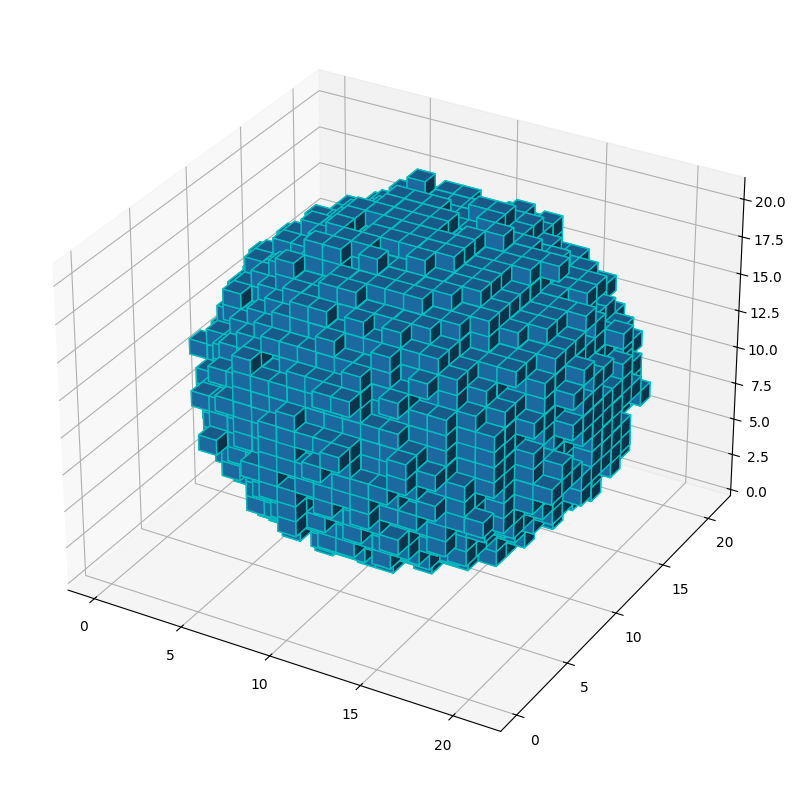

In [81]:
def plot3d(voxels):
    """Plot a collection of 3d voxels as voxels, using axes3d."""
    import numpy as np
    from mpl_toolkits.mplot3d import axes3d
    N = max(map(abs, flatten(voxels))) + 1
    A = np.zeros((N, N, N)) # An N x N x N array
    for x, y, z in voxels:
        A[x, y, z] = 1
    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
    ax.voxels(A, edgecolor='c')
    
plot3d(in18)

Looking at the plot gives me an idea. (I'm not sure why I needed the plot to get the idea, but that's how it played out. Anyway, I was glad to learn how to plot in 3d.) With this small 20x20x20 space, I can efficiently do a [**flood fill**](https://en.wikipedia.org/wiki/Flood_fill) from somewhere in the exterior of the droplet, and count how many times the fill bumps up against a face on the surface of the droplet. That is, I start at a location that I know is outside the voxels; I'll use , `(-1, -1, -1)`, because all the coordinates are non-negative. Then I expand from that location in all directions, making sure to:
- Keep a queue of points that we still need to flood from, and a set of the points that we have already seen.
- Repeatedly pop a point from the queue and for each of its neighboring points, `p`:
  - If `p` is one of the voxels of the droplet, that means the fill has entered the voxel from one of its exterior faces; add one to `surfaces` to keep track.
  - If `p` has not already been considered, and if it is not too far away from the droplet (i.e. check that all three coordinates are between -1 and `N`), then add `p` to the queue and mark it as already seen.


In [82]:
def exterior_surface_area(voxels) -> int:
    """Calculate the exterior surface area by a flood fill algorithm."""
    N = max(map(abs, flatten(voxels))) # Largest coordinate in any direction.
    Q = [(-1, -1, -1)]
    already_seen = set()
    surface_count = 0
    while Q:
        for p in voxel_neighbors(Q.pop()):
            if p in voxels: # Bumped into one of the faces of one of the voxels
                surface_count += 1 
            elif p not in already_seen and all(-1 <= p_i <= N + 1 for p_i in p):
                Q.append(p)
                already_seen.add(p)
    return surface_count

This gives me the correct answer:

In [83]:
answer(18.2, 2458, lambda: 
       exterior_surface_area(in18))

Puzzle 18.2:   774.1 msec, correct answer: 2458           

<img src="https://pbs.twimg.com/media/FkShrWXWYAUXP1E?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 19](https://adventofcode.com/2022/day/19): Not Enough Minerals

**Today's input** is a sequence of "blueprints," one per line, for a robot factory that can build four kinds of robots (ore-collecting, clay-collecting, obsidian-collecting, and geode-cracking). Each robot has a cost in raw materials (ore, clay, and obsidian). The input format is complicated, and at first I thought that each line could have arbitrary names in arbitrary order for the resources, but the puzzle instructions make it clear that each line presents 7 integers in exactly the same order with the same meaning, so all I have to do is extract the 7 integers with the function   `ints` and then make a `Blueprint` structure from them. In `Blueprint`, and throughout this puzzle, I use 3-letter abbreviations (lowercase for raw materials, UPPERCASE for robots) as follows:

|full  name|raw material|robot|costs to build this robot|
|--|--|--|--|
|ore|ore|ORE|ore_ORE|
|clay|cla|CLA|ore_CLA|
|obsidian|obs|OBS|ore_OBS, cla_OBS|
|geode|geo|GEO|ore_GEO, obs_GEO|

In [84]:
Blueprint = namedtuple('Blueprint', 'id, ore_ORE, ore_CLA, ore_OBS, cla_OBS, ore_GEO, obs_GEO')

def parse_blueprint(line: str) -> Blueprint: return Blueprint(*ints(line))

in19 = parse(19, parse_blueprint)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 30 strs of size 158 to 161:
────────────────────────────────────────────────────────────────────────────────────────────────────
Blueprint 1: Each ore robot costs 3 ore. Each clay robot costs 3 ore. Each obsidian robot costs  ...
Blueprint 2: Each ore robot costs 3 ore. Each clay robot costs 3 ore. Each obsidian robot costs  ...
Blueprint 3: Each ore robot costs 4 ore. Each clay robot costs 3 ore. Each obsidian robot costs  ...
Blueprint 4: Each ore robot costs 3 ore. Each clay robot costs 4 ore. Each obsidian robot costs  ...
Blueprint 5: Each ore robot costs 4 ore. Each clay robot costs 4 ore. Each obsidian robot costs  ...
Blueprint 6: Each ore robot costs 4 ore. Each clay robot costs 4 ore. Each obsidian robot costs  ...
Blueprint 7: Each ore robot costs 2 ore. Each clay robot costs 4 ore. Each obsidian robot costs  ...
Blueprint 8: Each ore robot costs 4 ore. Each cl

### Part 1:  What do you get if you add up the quality level of all of the blueprints in your list?

Each kind of robot collects (or cracks) one unit of its corresponding raw material on each time step. The instructions say  "*you have exactly one ore-collecting robot in your pack that you can use to kickstart the whole operation,*" so that robot will collect one more ore on each time step, regardless of what else we build. Once enough raw materials have been gathered, we have the option of building one robot from the materials. We can only build one robot per minute, even if we have enough resources to build more.

The goal is to "*determine the quality level of each blueprint by multiplying that blueprint's ID number with the largest number of geodes that can be opened in 24 minutes using that blueprint.*" So it will be a **search problem** where we decide the best sequence of actions to make the most geodes.  The problem is that the search space is **huge**, so the code will be slow without some tricks. 

Here's how I think about the search:
- At each time point there are up to 5 possible actions: build one of the 4 kinds of robots, or just wait. 
- So there could be up to 5<sup>24</sup> ≈ 10<sup>17</sup> paths in the tree. But not every robot can be built on every step, so maybe 4<sup>24</sup> ≈ 10<sup>14</sup>.
- A state in the search consists of the time remaining and the number of robots and resources of each kind. 
- The amount of stuff grows exponentially, so there are many possible states.
- **Pruning repeated states** will help.
- We can also **prune dominated states**. If we produce a certain amount of stuff at time *t*, then if another branch of the search tree produces the same amount of stuff at time *t* + 1, we can prune that branch. Or if another branch at time *t* produces strictly less-than-or-equal stuff in every category, we can prune that.
- We can **prune branches that can't be best**. Use depth-first-search to quickly get to a leaf of the tree and record the number of geodes. Then for all other states, ask "What's the most number of geodes that could be made from here? What if I could build a geode robot in every remaining turn? How many geodes would that produce? If the answer is less than the best so far, prune it.
- Maximizing geode robots is good. But you **never need more ore robots than the other robot's ore-cost.** In Blueprint 2 all robots require 3 or less ore to build, so you never need more than 3 ore robots, because each turn you will get enough ore to build whatever you want. Similarly with clay robots (you only need 8 with Blueprint 2) and obsidian robots (you need 12).
  
  
  Let's consider the example input:

In [85]:
ex19 = parse(""" 
Blueprint 1: 
  Each ore robot costs 4 ore. 
  Each clay robot costs 2 ore. 
  Each obsidian robot costs 3 ore and 14 clay. 
  Each geode robot costs 2 ore and 7 obsidian.
Blueprint 2: 
  Each ore robot costs 2 ore. 
  Each clay robot costs 3 ore. 
  Each obsidian robot costs 3 ore and 8 clay. 
  Each geode robot costs 3 ore and 12 obsidian."""
  .replace(' \n', ' '), parse_blueprint)

ex19

(Blueprint(id=1, ore_ORE=4, ore_CLA=2, ore_OBS=3, cla_OBS=14, ore_GEO=2, obs_GEO=7),
 Blueprint(id=2, ore_ORE=2, ore_CLA=3, ore_OBS=3, cla_OBS=8, ore_GEO=3, obs_GEO=12))

I think all the above ideas are good, and I'll implement them. Here are some more ideas that I won't implement unless the search turns out to be really slow:

- There are also **limits to how much raw materials** (such as ore) you need. For example, if state *s*<sub>1</sub> has 10 minutes left,  20 ore, and 70 obsidian, then that's enough to build a geode robot every turn. If later in the search you arrive at state *s*<sub>2</sub> which has 10 minutes left, 20 ore, and 71 obsidian, you can prune *s*<sub>2</sub> because it is no better than *s*<sub>1</sub>; the extra obsidian is superflous. 
- We could use **compound actions**. In [Day 16](#Day-16:-Proboscidea-Volcanium) I replaced the four actions "*go from room A through rooms B and C and then to D and then open the non-zero-flow valve there*" with a single action. We could use the same idea here: instead of waiting, say, 4 turns to have enough ore, and then building an ore robot, we could have a single 5-minute-long action to wait and then build the robot. 
- We could **prioritize geode robots**. I think that if it is possible to build a geode robot, we should do only that. But I'm not 100% sure.

Here are three key pieces to the implementation:
- `Stuff`, a class that serves as a state in our search; it records the amount of robots and raw materials, as well as the time remaining, `time_left`.
- `quality_level`, a function that multiplies a blueprint ID times the maximum geodes the blueprint can lead to.
- `max_geodes`, the search function that returns the state with the most geodes.

In [86]:
Stuff = namedtuple('Stuff', 'time_left, ORE, CLA, OBS, GEO, ore, cla, obs, geo', defaults=(0,)*9)

def quality_level(blueprint) -> int: return blueprint.id * max_geodes(blueprint).geo

def max_geodes(blueprint, minutes=24, start=Stuff(ORE=1)) -> Stuff:
    """Depth-first Search for `minutes` for a state that produces the most geodes."""
    start   = start._replace(time_left=minutes)
    best    = start
    limits  = stuff_limits(blueprint)
    visited = {}
    stack = [start]
    while stack:
        state = stack.pop()
        if state.geo > best.geo:
            best = state
        if state.time_left > 0 and not pruned(state, limits, visited, best):
            children = next_stuff(state, blueprint, limits)
            stack.extend(children)
    return best

The function `next_stuff` below returns a list of successor states for a given state. First it figures out what raw materials are `collected` by the robots; then it considers whether each kind of robot can be built. The best successors (such as building a GEO robot) come last, so that when they are placed on the stack of states, they will be popped off first.

In [87]:
def next_stuff(state, blueprint, limits):
    """Generate successor states."""
    time_left, ORE, CLA, OBS, GEO, ore, cla, obs, geo        = state
    id, ore_ORE, ore_CLA, ore_OBS, cla_OBS, ore_GEO, obs_GEO = blueprint
    collect = incr_stuff(state, time_left=-1, ore=ORE, cla=CLA, obs=OBS, geo=GEO)
    successors = [collect] # One next state is to build nothing, just collect
    
    def build(**kwds): successors.append(incr_stuff(collect, **kwds))

    if ORE < limits.ORE and ore >= ore_ORE: 
        build(ORE=+1, ore=-ore_ORE)
    if CLA < limits.CLA and ore >= ore_CLA:
        build(CLA=+1, ore=-ore_CLA)
    if OBS < limits.OBS and ore >= ore_OBS and cla >= cla_OBS:
        build(OBS=+1, ore=-ore_OBS, cla=-cla_OBS)
    if ore >= ore_GEO and obs >= obs_GEO:
        build(GEO=+1, ore=-ore_GEO, obs=-obs_GEO)
        
    return successors


def incr_stuff(state, **fields) -> Stuff:
    """Increment (or decrement) the specified fields in state by given amounts."""
    return Stuff(*add(state, Stuff(**fields)))

*Note*: The function `incr_stuff` takes a Stuff state and increments (or decrements) some of the fields by the  amounts specified by keywords, resulting in a new state. 
My generic vector-addition function `add` works on namedtuples.

Here's a test: with one ORE robot and 3 ore, build an ORE robot at a cost of 2 ore, giving 2 robots and 1 ore.

In [88]:
assert incr_stuff(Stuff(ORE=1, ore=3), ORE=+1, ore=-2) == Stuff(ORE=2, ore=1)

The function `stuff_limits` implements limits on the number of robots and raw material that we could need. From experimenting with different values of `repeat`, I think the limits on raw materials are not that helpful. The limits on robots are very useful, I think.

In [89]:
def stuff_limits(blueprint):
    """The maximum amount of robots that are useful."""
    _, ore_ORE, ore_CLA, ore_OBS, cla_OBS, ore_GEO, obs_GEO = blueprint
    return Stuff(*9*[inf])._replace(ORE=max(ore_ORE, ore_CLA, ore_OBS, ore_GEO), CLA=cla_OBS, OBS=obs_GEO)

Below, `pruned` determines whether a state should be pruned (that is, cut off the search branch). It returns true if either it is a repeat of a previous state, or it is dominated by a previous state, or if the maximum number of geodes it could produce if we built a geode robot every minute is still less than the best state so far. 

Checking if a state is dominated by a previous one is not so easy. I've made a tradeoff between ease of writing the code, thoroughness of the checking, and computational time to do the checking. I divide a state up into two parts: the `key` consists of the time left and the robots. So we're asking "how much raw materials could we generate with these robots and this much time left." The `val` is how much raw materials a state was able to reach. For each key I'll only keep one `val`, even though there might be several worthy states. For example, a given time/robot key might produce 3 ore and 2 clay, or 2 ore and 3 clay; neither of those dominates the other, but I'll only remember one of them. If the search is not fast enough, I could come back and try more complex pruning.

In [90]:
def pruned(state, limits, visited, best) -> bool:
    """Should this branch be pruned? (Is there no way this state can lead to a best solution?)"""
    key = mapt(min, state, limits)[:5] # The time and robots, capped at the max useful
    val = state[5:] # The raw materials
    if (key in visited and all(v <= old for v, old in zip(val, visited[key]))):
        return True # Some previous state dominates this one
    visited[key] = val
    upper_bound = state.geo + sum(range(state.GEO, state.GEO + state.time_left))
    return upper_bound <= best.geo

Along the way I had a couple of **bugs** where I was confused between replacing values and incrementing values in a state; I made that issue less error-prone by introducing the `incr_stuff` and `build` functions. Once that was cleaned up, I got the right answer right away, and it was fast enough.

In [91]:
answer(19.1, 1349, lambda: 
       sum(map(quality_level, in19))) 

Puzzle 19.1:   802.7 msec, correct answer: 1349           

That's the quality level, but I'm actually interested in how many geodes were made by each blueprint:

In [92]:
Counter(max_geodes(bp).geo for bp in in19)

Counter({0: 10, 3: 5, 1: 3, 2: 3, 9: 2, 4: 2, 7: 2, 8: 1, 5: 1, 10: 1})

### Part 2: For each of the first three blueprints, determine the largest number of geodes you could open ... What do you get if you multiply these numbers together?

Now we are told "*you probably have 32 minutes*" to go. For a hypothetical search that is not good at pruning and has a branching factor of 4, that would be 4<sup>32-24</sup> = 65,536 times more states per blueprint. Fortunately we only have to handle the first 3 blueprints, not all 30. Also fortunately, my search does a decent enough job at pruning, so it turns out that Part 2 only takes twice as long as Part 1:

In [93]:
answer(19.2, 21840, lambda: 
       prod(max_geodes(bp, 32).geo for bp in in19[:3]))

Puzzle 19.2: 1,296.8 msec, correct answer: 21840          

# [Day 20](https://adventofcode.com/2022/day/20): Grove Positioning System

**Today's input** is an encrypted file consisting of a sequence of integers, one per line: 

In [94]:
in20 = parse(20, int)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 5000 strs of size 1 to 5:
────────────────────────────────────────────────────────────────────────────────────────────────────
-1581
7547
568
-1972
7952
-1510
-7259
6120
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 5000 ints in range -9993 to 10000:
────────────────────────────────────────────────────────────────────────────────────────────────────
-1581
7547
568
-1972
7952
-1510
-7259
6120
...
────────────────────────────────────────────────────────────────────────────────────────────────────


What does the distribution of numbers look like?

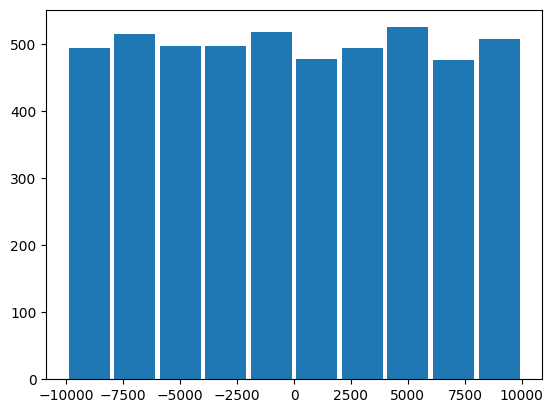

In [95]:
plt.hist(in20, rwidth=0.9);

The numbers appear to be sampled uniformly from the range -10,000 to 10,000.

### Part 1: Mix your encrypted file exactly once. What is the sum of the three numbers that form the grove coordinates?

The **mixing** process used to decrypt the encrypted file is as follows:
- *To mix the file, move each number forward or backward in the file a number of positions equal to the value of the number being moved. The list is circular, so moving a number off one end of the list wraps back around to the other end as if the ends were connected. The numbers should be moved in the order they originally appear in the encrypted file. Numbers moving around during the mixing process do not change the order in which the numbers are moved.*

After we mix the numbers, we are told that "*the **grove coordinates** can be found by looking at the 1000th, 2000th, and 3000th numbers after the value 0, wrapping around the list as necessary.*"



I'll take a straightforward approach, finding each number in the mixed-up list, deleting it from its current position, and re-inserting it in the new position. All three of those operations on Python lists are *O*(*n*), but there are only 5,000 numbers, so that should be fast enough. If it isn't, I'll  do something tricky like a [skip list](https://en.wikipedia.org/wiki/Skip_list).

One important issue: there can be **duplicate numbers** in the input list. The list might be `mixednums = [10, 20, -30, 20]`. So when I try to find the position of the number `n = 20` with `mixednums.index(n)`, how do I make sure that `.index` finds the right `20`? 

Butler Lampson [said](https://quotefancy.com/butler-lampson-quotes) that *all problems in computer science can be solved by another level of indirection,* and while that may not be true of *all* problems, it is true for this one.   I won't directly mix up the list `[10, 20, -30, 20]`. Instead, I'll mix up a list of indexes `[0, 1, 2, 3]`, and keep a copy of the original list so that I always know that index `1` refers to the first `20` in the list, and index `3` refers to the other `20`. 

Despite taking a straightforward approach, I did have an **annoying bug**: I was computing the new index, `j`, modulo  `N`, but it should be modulo `(N - 1)`, because one number was deleted from the list. (Alternatively, I could have used `len(mixednums)`, but not `len(numbers)`.)



In [96]:
def mix(numbers) -> list[int]:
    """Mix the numbers by, in turn, moving each one right or left by its value."""
    N = len(numbers)
    mixednums = list(range(N)) # A list of indexes into `numbers`; this will be mixed up.
    for n in range(N):
        # Move the `n`th number (in the original list of numbers) from position `i` to position `j`
        i = mixednums.index(n)
        del mixednums[i]
        j = (i + numbers[n]) % (N - 1)
        mixednums.insert(j, n)
    return [numbers[i] for i in mixednums] # Convert indexes back to original numbers

def grove_coordinates(numbers, offsets=(1000, 2000, 3000)) -> list[int]:
    """The numbers at these offsets from the number 0."""
    assert 0 in numbers
    i = numbers.index(0)
    return [numbers[(i + offset) % len(numbers)] for offset in offsets]

answer(20.1, 1087, lambda: 
       sum(grove_coordinates(mix(in20))))

Puzzle 20.1:    41.8 msec, correct answer: 1087           

### Part 2: Apply the decryption key and mix your encrypted file ten times. What is the sum of the three numbers that form the grove coordinates?

In Part 2 the story is that, "*you suddenly remember the rest of the decryption routine ... First, you need to apply the **decryption key**, 811589153. Multiply each number by the decryption key before you begin; this will produce the actual list of numbers to mix. Second, you need to mix the list of numbers **ten times**. The order in which the numbers are mixed does not change during mixing; the numbers are still moved in the order they appeared in the original, pre-mixed list.*"

(*Note*: I think the point of the decryption key, from the point of view of the [puzzle-maker](http://was.tl), is that if in Part 1 you used a doubly-linked list and moved the numbers one position at a time, you could get away with moving a number *x* by *x* positions, whereas now you really need to be sure to use *x* mod *N*.)

Many of the Part 2 puzzles have a scary exponential blowup, but this one will just be a 10-fold increase in run time. I just have to revise `mix` to handle the multiplication by the decryption key, and the repetition of the mixing. I will make the new version of `mix` backwards compatible:

In [97]:
def mix(numbers, key=1, repeat=1) -> list[int]:
    """Multiply each number by `key` and mix them by, in turn, moving each one right or left 
    by its value (positive or negative, and wrapping around). Repeat the process `repeat` times."""
    N = len(numbers)
    decrypted = [n * key for n in numbers] # Apply the decryption key
    mixednums = list(range(N)) # A list of indexes into `decrypted`; this will be mixed up.
    for _ in range(repeat):
        for n in range(N):
            # Move the `n`th number (in the original list of numbers) from position `i` to position `j`
            i = mixednums.index(n)
            j = (i + decrypted[n]) % (N - 1)
            del mixednums[i]
            mixednums.insert(j, n)
    return [decrypted[i] for i in mixednums] # Convert indexes back to decrypted numbers

answer(20.1, 1087, lambda: 
       sum(grove_coordinates(mix(in20))))

Puzzle 20.1:    41.4 msec, correct answer: 1087           

In [98]:
answer(20.2, 13084440324666, lambda: 
       sum(grove_coordinates(mix(in20, key=811589153, repeat=10))))

Puzzle 20.2:   611.3 msec, correct answer: 13084440324666 

This took more than 10 times longer; I'm not sure why.

<img src="https://pbs.twimg.com/media/Fkc-AMcX0Ac9G7k?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

# [Day 21](https://adventofcode.com/2022/day/21): Monkey Math

In **today's input**  each line gives the name of a monkey, and a math expression; either an integer or a binary operation. It is the **monkey's job** to compute the value of the expression and yell it out.

My `parse_job` function will parse each line into a pair of (*monkey*, *expression*):

In [99]:
def parse_job(line) -> tuple:
    """Parse a line into a (monkey_name, exp) pair; either (x, (y, op, z) or (x, int)."""
    name, *rest = line.replace(':', '').split()
    exp = (int(the(rest)) if len(rest) == 1 else tuple(rest))
    return (name, exp)
    
in21 = parse(21, parse_job)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2703 strs of size 7 to 17:
────────────────────────────────────────────────────────────────────────────────────────────────────
gsll: ssvq + jrwt
vngc: svmp * dclz
sqnz: 2
nnvp: 16
ldsw: 2
ttth: qbjv + ljwb
vlbc: fwtt * rsvd
gnqp: mbqj + hctc
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2703 tuples of size 2:
────────────────────────────────────────────────────────────────────────────────────────────────────
('gsll', ('ssvq', '+', 'jrwt'))
('vngc', ('svmp', '*', 'dclz'))
('sqnz', 2)
('nnvp', 16)
('ldsw', 2)
('ttth', ('qbjv', '+', 'ljwb'))
('vlbc', ('fwtt', '*', 'rsvd'))
('gnqp', ('mbqj', '+', 'hctc'))
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: What number will the monkey named *root* yell?

The instructions say "*Each monkey is given a job: either to yell a specific number or to yell the result of a math operation. All of the number-yelling monkeys know their number from the start; however, the math operation monkeys need to wait for two other monkeys to yell a number, and those two other monkeys might also be waiting on other monkeys.*" Our job  "*is to work out the number the monkey named root will yell before the monkeys figure it out themselves.*"

Because the puzzle is stated with language like "*the math operation monkeys need to wait*," you might over-think it and institute a complex dataflow model with delays and wait states. But that's not necessary; just think of the dict as describing as **expression tree**. My function `yell` will compute the value of `root` by recursively computing partial results:

In [100]:
def yell(jobs: dict, name='root') -> int:
    """Compute the number yelled by the monkey with the given name."""
    if isinstance(jobs[name], tuple):
        L_name, op, R_name = jobs[name]
        return operators[op](yell(jobs, L_name), yell(jobs, R_name))
    else:
        return jobs[name]
    
operators['/'] = operator.truediv

answer(21.1, 353837700405464, 
       lambda: yell(dict(in21)))

Puzzle 21.1:     0.4 msec, correct answer: 353837700405464.0

*Note*: `operators` was defined to be a dict of `{'+': operator.add, ...}` on [**Day 11**](#Day-11:-Monkey-in-the-Middle). Here I add the `'/'` operator, which wasn't used on Day 11. 

### Part 2: What number do you yell to pass root's equality test?

In Part 2 we are told that we got the process wrong in Part 1: "*First, you got the wrong job for the monkey named root; specifically, you got the wrong math operation. The correct operation for monkey root should be =, which means that it still listens for two numbers (from the same two monkeys as before), but now checks that the two numbers **match**.
Second, you got the wrong monkey for the job starting with **humn:**. It isn't a monkey - it's **you**. Actually, you got the job wrong, too: you need to figure out **what number you need to yell** so that root's equality check passes.*"

In other words, I should replace the root operator with an equality test, `=`, and I should figure out what value `humn` should be set to in order to make the equality test true. So now the **expression tree** is an equation with one unknown, **humn**.

I know that the [**SymPy**](https://www.sympy.org/en/index.html) function `sympy.solve` can solve equations. Here's how it works on a simplified example:
- Suppose one side of `root`'s job is the tree `(4 * humn / 2) + 1`.
- Suppose the other side is the tree `(1 + 2) * 3)`.
- I can form the SymPy equation `Eq((4 * humn / 2) + 1, (1 + 2) * 3)`, where `humn` is a SymPy symbol.
- (Note that `(4 * humn / 2) + 1 == (1 + 2) * 3)` wouldn't be a SymPy equation; it would just be the bool `False`.)
- I can then ask `sympy.solve` to find the value(s) of `humn` that solve this equation.
- *Note*: `sympy.solve` returns a **list** of all possible solutions (e.g., there could be two for a quadratic equation). 

Here's the code:

In [101]:
import sympy

humn = sympy.Symbol('humn')
lhs  = (4 * humn / 2) + 1
rhs  = (1 + 2) * 3
eqn  = sympy.Eq(lhs, rhs)
print(sympy.solve(eqn))

[4]


We can still use `yell` from Part 1, without change, to build the SymPy equation (rather than to compute an integer). we just need to pass `yell` a modified jobs dict where the entries for `'humn'` and `'root'` have been updated. We also need to add the `'='` operator to `operators`. Finally, I felt bad that I needed to throw in the `round` because there was some roundoff error due to division of large integers. Alternatively, that could be fixed by making the integers in `jobs2` be `sympy.Integer` instead of `int`.

In [102]:
operators['='] = sympy.Eq

def fix_jobs(jobs: dict) -> dict:
    """Fix the interpretation of `humn` and `root`."""
    L, _, R = jobs['root']
    return {**jobs, **{'humn': sympy.Symbol('humn'), 'root': (L, '=', R)}}

answer(21.2, 3678125408017, lambda: 
       int(round(the(sympy.solve(yell(fix_jobs(dict(in21))))))))

Puzzle 21.2:     7.4 msec, correct answer: 3678125408017  

<img src="https://pbs.twimg.com/media/FkiV7laXEAAWkXC?format=jpg&name=small" width=300 title="Drawing by Gary Grady @GaryJGrady">

# [Day 22](https://adventofcode.com/2022/day/22):  Monkey Map

**Today's input** is in two pragraphs:
- A **grid map** of the jungle, with wall (`'#'`) and open (`'.'`) locations. Empty spaces are off the map.
- A **path description**, denoted as as alternating distances to move (integers) and directions to turn (`'L'` or `'R'`).

The function `parse22` handles both types of paragraph:

In [103]:
def parse22(paragraph: str) -> tuple:
    """Parse either a grid map (into a list of rows) or a path description (into atoms)."""
    if paragraph.startswith((' ', '.', '#')):
        return lines(paragraph)
    else:
        return mapt(atom, re.findall(r'L|R|\d+', paragraph))

in22 = parse(22, parse22, paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 202 strs of size 0 to 5649:
────────────────────────────────────────────────────────────────────────────────────────────────────
                                                  .....................#.....#.................. ...
                                                  .....#..................#........#............ ...
                                                  ........#..................#..........#....... ...
                                                  .#...................#......#........#..#..#.. ...
                                                  ..###................#...........#.......#.... ...
                                                  ...#............#..........#..............#..# ...
                                                  ..##.#............#...#.#.....#..##........... ...
                                                

### Part 1: Follow the path given in the monkeys' notes. What is the final password?

Following the path should be easy. To quote the puzzle "*You begin the path in the leftmost open tile of the top row of tiles ... A number indicates the number of tiles to move in the direction you are facing. If you run into a wall, you stop moving. ... A letter indicates whether to turn 90 degrees clockwise (R) or counterclockwise (L).*" There is one complication: "*If a movement instruction would take you off of the map, you wrap around to the other side of the board. In other words, if your next tile is off of the board, you should instead look in the direction opposite of your current facing as far as you can until you find the opposite edge of the board, then reappear there.*"

In [104]:
def follow_path(grid, moves) -> tuple[Point, Vector]:
    """Follow the path on the grid; return the final (location, facing_direction) pair."""
    # Start in the leftmost open tile of top row, facing East.
    loc    = min(p for p in grid if Y_(p) == 0) 
    facing = East
    for move in moves:
        if move in ('L', 'R'):
            facing = make_turn(facing, move) 
        else:
            loc = move_forward(loc, facing, move, grid)
    return loc, facing

def move_forward(loc, facing, n, grid) -> Point:
    """Move forward `n` spaces in the facing direction, 
    wrapping around if necessary, stopping when hitting a wall."""
    for i in range(n):
        oldloc = loc
        loc = add2(loc, facing)
        if loc not in grid: # Wrap around
            loc = wrap_around(oldloc, facing, grid)
        if grid[loc] == '#':
            loc = oldloc
            break
    return loc

def wrap_around(loc, facing, grid) -> Point:
    """Can't go forward in `facing` direction, so look in the reverse direction,
    keep going until off the grid; then back up to get onto the grid again."""
    reverse = neg(facing)
    while loc in grid:
        loc = add2(loc, reverse)
    return add2(loc, facing) # Went one too far; back up.

def final_password(lines, moves):
    """Follow the path, then do the password computation on the resulting location and facing."""
    grid = Grid(lines, skip=' ')
    (col, row), facing = follow_path(grid, moves)
    f = [East, South, West, North].index(facing)
    return 1000 * (row + 1) + 4 * (col + 1) + f

In [105]:
answer(22.1, 1428, lambda: 
       final_password(*in22))

Puzzle 22.1:     5.8 msec, correct answer: 1428           

*Note*: I got the right answer above, but my first attempt had a **bug**, so I ran the code on the small example in the puzzle description, and I wrote tests:

In [106]:
text22 = """\
        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.

10R5L5R10L4R5L5"""

lines22, moves22 = parse(text22, parse22, paragraphs)
grid = Grid(lines22, skip =' ')

# Unit tests based on the sample input
assert make_turn(East, 'R') == South
assert make_turn(South, 'L') == East

A, B, C, D = (11, 6), (0, 6), (5, 7), (5, 4)
assert move_forward(A, East, 1, grid) == B
assert move_forward(B, West, 1, grid) == A
assert move_forward(C, South, 1, grid) == D
assert move_forward(D, North, 1, grid) == C

assert move_forward((8, 0), East, 10, grid) == (10, 0)
assert move_forward((10, 0), South, 5, grid) == (10, 5)
assert move_forward((10, 5), East, 5, grid) == (3, 5)

# Integration tests
assert follow_path(grid, moves22) == ((7, 5), East)
assert final_password(grid, moves22) == 6032

All the tests passed, and I got the right final password answer on the small sample input.

So there must have been something about the big input that didn't show up in the small sample input. I had a look:

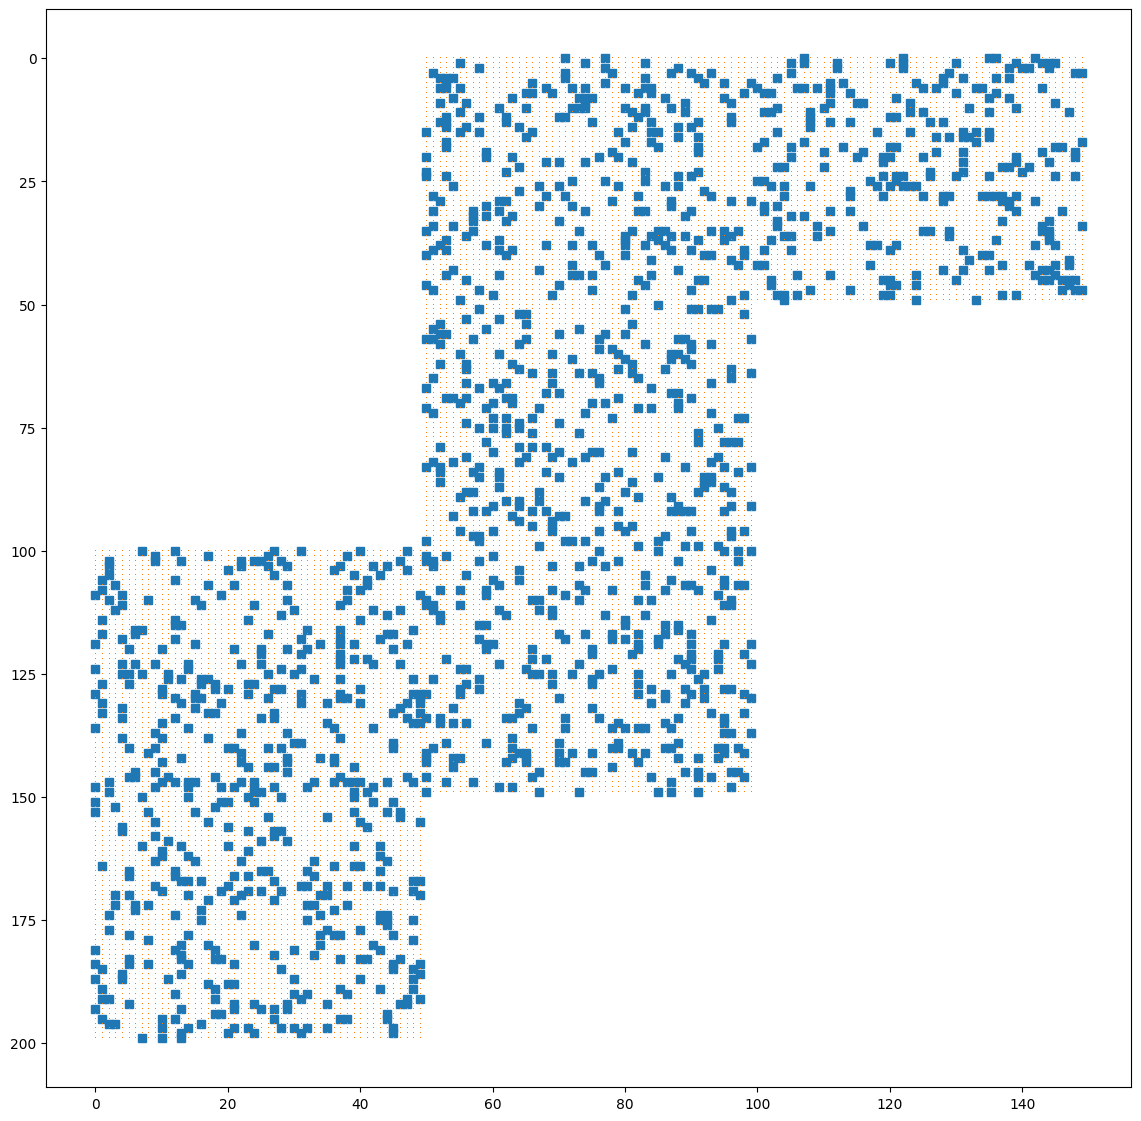

In [107]:
Grid(in22[0], skip=' ').plot();

Nothing in the big input looks particularly tricky. However, one thing did strike me: the plot shows walls right on the edge of the grid; what if the wrap-around location is a wall? That turned out to be the **bug**: in `move_forward`, I originally had `elif grid[loc] == '#'`; it should be just `if grid[loc] == '#'`. (The instructions actually mentioned this case: "*It is possible for the next tile (after wrapping around) to be a wall; this still counts as there being a wall in front of you, and so movement stops before you actually wrap to the other side of the board,*", but I missed it.) With that bug fixed, everything worked.

### Part 2: Fold the map into a cube, then follow the path given in the monkeys' notes. What is the final password?

***Nope. I'll pass*** 

Part 2 says "*You are met with a large cube; each of its six faces is a square of 50x50 tiles. To be fair, the monkeys' map does have six 50x50 regions on it. If you were to carefully fold the map, you should be able to shape it into a cube! ... Now, if you would walk off the board, you instead proceed around the cube.*"

Getting the folding right sounds **tedious**. I was tempted to try to figure out how to do [spatial rotations with quaternions](https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation), something I do wish I understood, but other holiday duties made me pass on this puzzle instead.

<img src="https://pbs.twimg.com/media/FknGe3yXkAARSfn?format=jpg&name=small" width=600 title="Drawing by Gary Grady @GaryJGrady">

In [108]:
# answer(22.2, ..., ...) # TODO

# [Day 23](https://adventofcode.com/2022/day/23): Unstable Diffusion


**Today's input** is another grid, showing elves (`'#'`) and empty ground (`'.'`):

In [109]:
in23 = parse(23)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 71 strs of size 71:
────────────────────────────────────────────────────────────────────────────────────────────────────
##...####.#.####.#...##...#####.##.##.#..#.#..#....#....#..#.##....#.#.
##########.##.#.###.####..######..#.###.#.....##.##..####....###..#..##
.......#..##....##..##.#...###.#.#..###.#.###.######....##..##...##...#
..##.#..#.#.###.###..####.#.####..#...##....#..#.#..##.#####.......###.
######..#..#...##.##.#..#####..#..#.#.#.#.#####.#.##..#.#.....##....###
..##.#.##.#####.###...#...#.##..#..####......#####.#.##..#.#...##.#.#..
#.##....####.#..##..##....###.######...#.#####..#.####.##.#....#.#####.
.####....####.........#.##.#..#.#.#.#.#.#####..###.####..###..#.#...#.#
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: Simulate the Elves' process and find the smallest rectangle that contains the Elves after 10 rounds. How many empty ground tiles does that rectangle contain?

The elves' process is described as follows:

*During the first half of each round, each Elf considers the eight positions adjacent to themself. If no other Elves are in one of those eight positions, the Elf does not do anything during this round. Otherwise, the Elf looks in each of four directions in the following order and proposes moving one step in the first valid direction:*
- *If there is no Elf in the `N`, `NE`, or `NW` adjacent positions, the Elf proposes moving north one step.*
- *If there is no Elf in the `S`, `SE`, or `SW` adjacent positions, the Elf proposes moving south one step.*
- *If there is no Elf in the `W`, `NW`, or `SW` adjacent positions, the Elf proposes moving west one step.*
- *If there is no Elf in the `E`, `NE`, or `SE` adjacent positions, the Elf proposes moving east one step.*

*After each Elf has had a chance to propose a move, the second half of the round can begin. Simultaneously, each Elf moves to their proposed destination tile if they were the only Elf to propose moving to that position. If two or more Elves propose moving to the same position, none of those Elves move.*

*Finally, at the end of the round, the first direction the Elves considered is moved to the end of the list of directions.* 

**This seems pretty easy!** There's no exponential computational issue; I just need to follow the rules for proposals and movement. The function `diffuse` will, on each round:
- Compute the `elf_proposals`, in the form `{destination: [proposing_elf_location...]}`.
- Update the grid for the proposals where only one elf proposes a destination.
- Rotate the `proposal_directions`.

At the end, we count the number of ground squares by finding the area of the bounding rectangle and subtracting the number of elves.

In [110]:
GROUND = '.'
ELF    = '#'

# E.g., move North if North, NE, NW are all clear; then try South, etc.
proposal_directions = (
    (North, NE, NW),
    (South, SE, SW),
    (West, NW, SW),
    (East, NE, SE))

def diffuse(lines, rounds: int) -> Grid:
    """Simulate the elves moving on a grid for the given number of rounds."""
    grid = Grid(lines, directions=directions8, default='.')
    directions = deque(proposal_directions) # Will mutate each round
    for _ in range(rounds):
        for dest, elfs in elf_proposals(grid, directions).items():
            if len(elfs) == 1:
                grid[dest], grid[elfs[0]] = ELF, GROUND
        directions.rotate(-1) 
    return grid

def elf_proposals(grid, directions) -> multimap:
    """Yield a mapping of {destination: [proposing_elf_location...]}.
    E.g. if elves at points p and q both propose to move to d, that's {d: [p, q]}."""
    proposals = multimap()
    for p in grid:
        if grid[p] == ELF and ELF in grid.neighbor_contents(p):
            for deltas in directions:
                if all(grid.get(add2(p, delta)) != ELF for delta in deltas):
                    proposals[add2(p, deltas[0])].append(p)
                    break
    return proposals
                    
def count_ground(grid) -> int:
    """The number of ground squares in the smallest rectangle containing all the elves."""
    # Compute the area of the bounding rectange and subtract elves
    elves = {p for p in grid if grid[p] == ELF}
    area = len(cover(Xs(elves))) * len(cover(Ys(elves)))
    return area - len(elves)

In [111]:
answer(23.1, 3871, lambda: 
       count_ground(diffuse(in23, 10)))

Puzzle 23.1:    64.9 msec, correct answer: 3871           

That was indeed easy, just like I thought it would be. On to Part 2!

### Part 2: What is the number of the first round where no Elf moves?

In Part 2 we are instructed to "*Finish simulating the process*." That is, we need to keep simulating until we reach a round where no elf moves; the answer is the number of that round.

This shows that I [chose poorly](https://www.youtube.com/watch?v=Ubw5N8iVDHI) in my abstractions for Part 1. I think there's a general lesson:
- The function `diffuse` has a `for` loop that updates the grid, then it returns the final grid.
- When you see a function like that, ask: will I always want to control the update with a `for` loop? Might I ever want a `while` loop?
- In this case, Part 2 does want to run the loop until a condition is true.
- Thus, it is more flexible for the loop to `yield` a partial result on each iteration, and let the caller decide when to stop.

Following this pattern, I refactored `diffuse` as follows:
- I'll keep the calling signature `diffuse(lines, rounds: int) -> Grid` for backward compatibility.
- However, most of the work will be moved to a new function, `diffusion_rounds`.
- `diffusion_rounds` yields the updated grid on each round of the diffusion process. It stops only when no elf can move.
- Applying `itertools.nth` to the `diffusion_rounds` iterable solves Part 1. 
- Counting the total number of grids yielded by the `diffusion_rounds` iterable solves Part 2. 


In [112]:
def diffuse(lines, rounds: int) -> Grid:
    """Simulate the elves moving on a grid for the given number of rounds."""
    return nth(diffusion_rounds(lines), rounds)

def diffusion_rounds(lines, proposal_directions=proposal_directions) -> Iterable[Grid]:
    """Simulate the elves until they stop moving."""
    directions = deque(proposal_directions) # Will mutate each round
    grid = Grid(lines, directions=directions8, default='.')
    yield grid # Yield the starting grid
    while True:
        proposals = elf_proposals(grid, directions)
        moves = {dest: the(src) for dest, src in proposals.items() if len(src) == 1}
        if not moves:
            return # No more diffusion left to do
        for dest, src in moves.items():
            grid[dest], grid[src] = ELF, GROUND
        directions.rotate(-1) 
        yield grid
        

The revision of `diffuse` is backwards compatible for solving Part 1:

In [113]:
answer(23.1, 3871, lambda: 
       count_ground(diffuse(in23, 10)))

Puzzle 23.1:    66.2 msec, correct answer: 3871           

And here is the solution to Part 2:

In [114]:
answer(23.2,  925, lambda: 
       quantify(diffusion_rounds(in23)))

Puzzle 23.2: 4,774.0 msec, correct answer: 925            

Here are some plots of the elves at various points in the simulation:

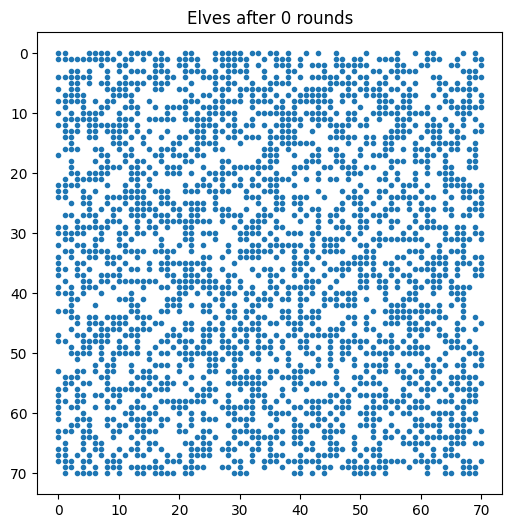

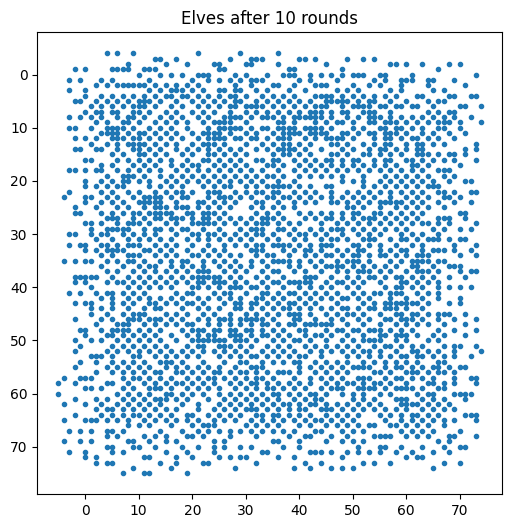

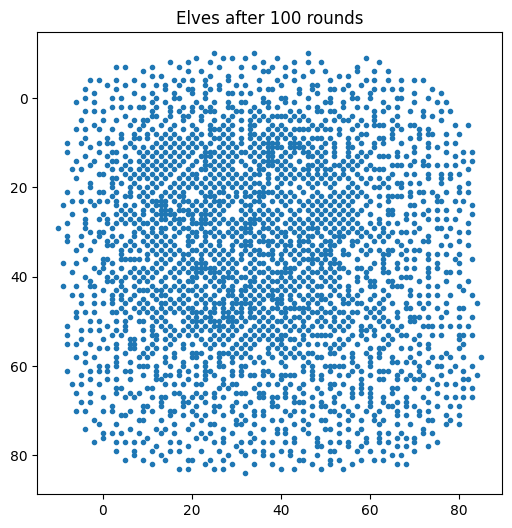

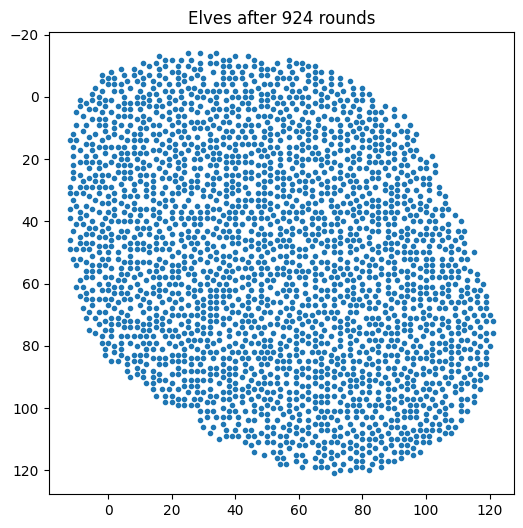

In [115]:
def plot_diffusion(grid, msg): 
    grid.plot({'#': '.'}, figsize=(6, 6))
    plt.title(f'Elves {msg}')
    
for i, grid in enumerate(diffusion_rounds(Grid(in23))):
    if i in (0, 10, 100, 924):
        plot_diffusion(grid, f'after {i} rounds')

Interesting! The shape starts out roughly square, stays that way for at least 100 rounds, but eventually the symmetry is broken, and the shape is an oval elongated on the NE-SW axis. Is that because of some chance fluctuation in the initial placement of elves? Or is it because of the ordering of the proposal directions? Let's try altering the ordering of the directions and plot again:

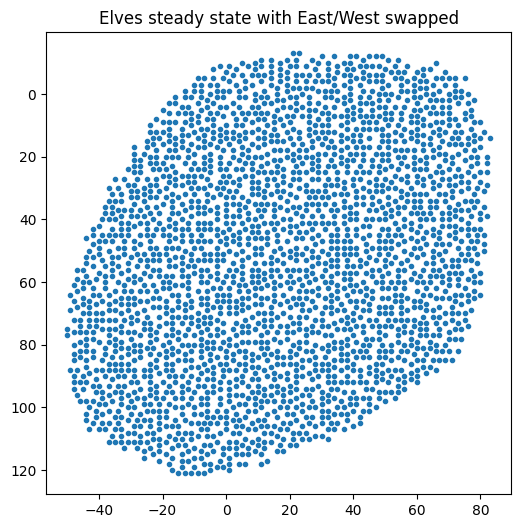

In [116]:
swap_east_west = ( 
    (North, NE, NW),
    (South, SE, SW),
    (East, NE, SE),
    (West, NW, SW))

plot_diffusion(last(diffusion_rounds(in23, proposal_directions=swap_east_west)), 
               'steady state with East/West swapped')

Yes, the ordering is what seems to make the difference.

# [Day 24](https://adventofcode.com/2022/day/24): Blizzard Basin


**Today's input** is a grid map of a basin, or valley. The map consists of walls (`'#'`), clear ground (`'.'`), and blizzards that are moving in one of four directions (`'^', 'v', '>', '<'`). 

In [117]:
in24 = parse(24)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 27 strs of size 122:
────────────────────────────────────────────────────────────────────────────────────────────────────
#.############################################################################################## ...
#.<v>><<<^v<>^<^vv.^<^^^<^v><>vv<v^.^v>v.^><v..<><..vv><v.<.v<<^.>>>>>>^<^>^>vv<^>>^v^.<.<<>^<<> ...
#>.<v>v<>v>vv^.<>^^v.><<^>^v^<>v^>>>><<^<^vv>v>><^>v.^v<<^v<.<>v>>^><>>^>^<>v<><<>.v.^<.<<>vvv<^ ...
#><.<<vvv<>.vvv<><^<>v<.v>v.<>^>^v>^<<><vv^<v>><vv<<><^^^v^>^..<<^<.><v<v>^^v.<<vv<v^^>vv><<>^v> ...
#>v>^v>>vvv<v><>.><>.>>v>vvv<v<v<>^>>><<>>><.vvv.<>.<>^<>v><<v^^<>v>.>^^v^.^><^<^<<v<<^<^<^<vv.> ...
#<^>v>vvv>v<v<vv<<.v<<v<^<v^.^v.>.>v^<..^.^<..^>>^vv^<<vv<><v.<<>>><^v><>>vv.v<^.v<v>^<>v.>^<.^v ...
#<^v<>vv<v^^>^>><<^<<v<>^<vv<<<^vv^<>>^^<.<<^^.v<^<><vv^v.v<>>v^<^^>v>v>><v<v>v^<<.^<<^>>><^v<>^ ...
#<.<.>vvv^^.^.<v.>^<<<.<>>>v^><.v>v.>^^<^>^><vv^<.<v>>>

#### Part 1: What is the fewest number of minutes required to avoid the blizzards and reach the goal?

Each blizzard moves one position in their direction each minute. We are told that "*as a blizzard reaches the wall of the valley, a new blizzard forms on the opposite side of the valley moving in the same direction*" and "*because blizzards are made of tiny snowflakes, they pass right through each other.*" That is, two or more blizzards can occupy the same position, and then the next turn they both go on their way.

Our task is to traverse from the starting point (the upper-leftmost `'.'` point) to the goal (the lower-rightmost  `'.'`) in the fewest number of turns, while avoiding the blizzards: we cannot end our turn sharing a position with a blizzard. 

When there are multiple possible moves we can't tell which one is best, so this will be a path-finding **search problem**.

In a "normal" path-finding search problem on a grid, the state is represented by an `(x, y)` location. But in this puzzle it seems as if each state will have to represent all the blizzards in the grid, because they are constantly moving. That will require a lot of memory to store the states, and it will make checking for repeated states slow. 

Fortunately, I have an idea for how to move the blizzard information out of each state:

- If the basin is *w* spaces wide, then in *w* minutes, all the east-moving blizzards in a given row will move east, hit the east wall one by one, re-appear at the west side of the row, and eventually return right to where they started. Similarly for all the west-moving blizzards, and for the north- and south-facing blizzards (except that they take *h* minutes to return to their original position, where *h* is the height of the basin).
- Therefore, after *m* minutes, where *m* is the least common multiple of *w* and *h*, all the blizzards will have returned to their original positions.
- So, we can pre-compute the positions of the blizzards for each of *m* time steps.
- That means that a state in the search problem consists of just the `(x, y)` position and the time modulo *m*. I call this a `BasinState`.
- You can think of this as a search through a three-dimensional rectangular *x*/*y*/*t* grid, where every move can go to an adjacent point in the *x*/*y* plane, but must go "down" along the *t*-axis from *t* to *t* + 1, except that when you reach *t* = *m*, you wrap around to *t* = 0.
- Actually, in the grid, the west wall is at *x* = 0, the east wall is at what I'll call *x* = *w* + 1, and the interior of the basin ranges from *x* = 1 to *x* = *w*, so we'll have to do `clock_mod`, not regular modulo.
- On the puzzle grid we have *w* = 120, *h* = 25, and thus the least common multiple *m* = 600 (which is not bad at all). 
- There are about 9 times more blizzard locations than empty ground locations, so it will be more efficient to store the empty ground locations.

In [118]:
Counter(cat(in24)) # How many of each character on the map?

Counter({'<': 717, '>': 692, 'v': 668, '^': 615, '.': 310, '#': 292})

I'll define a `BasinProblem` as a subclass of `SearchProblem` where we cache all the empty ground locations:

In [119]:
BasinState = namedtuple('BasinState', 't, point') # A state is a time and a location.

class BasinProblem(SearchProblem):
    """Convert a basin grid into a SearchProblem suitable for A_star_search."""
    def __init__(self, grid: Grid):
        """set up the problem and cache empty ground locations for all future times."""
        self.size    = (max(Xs(grid)) - 1, max(Ys(grid)) - 1) # (width, height)
        empties      = {p for p in grid if grid[p] == '.'}    # All empty ground locations
        self.initial = BasinState(t=0,   point=min(empties))  # Upper-left '.'
        self.goal    = BasinState(t=any, point=max(empties))  # Lower-right '.'
        self.cache_empties(grid)
        
    def cache_empties(self, grid) -> list[set[Point]]:
        """Store in self.empties[t] all the points that arre free of blizzards at time t."""
        w, h         = self.size          # width and height
        m            = lcm(w, h)          # least common multiple
        self.empties = [None] * m         # grounds[t]: empty ground at time t
        basin        = {p for p in grid if grid[p] != '#'} # Non-wall locations
        blizzards    = {arrow: {p for p in grid if grid[p] == arrow} for arrow in '^v<>'}
        for t in range(m):
            self.empties[t] = basin - union(blizzards.values())
            blizzards = {arrow: slide_mod(blizzards[arrow], arrow_direction[arrow], self.size) 
                         for arrow in '^v><'}

    def is_goal(self, state) -> bool: return state.point == self.goal.point
                                  
    def h(self, node) -> int: return taxi_distance(node.state.point, self.goal.point)
 
    def actions(self, state):
        """Actions and states are both of the form `BasinState(t, (x, y))`."""
        t2 = (state.t + 1) % len(self.empties)
        return [BasinState(t2, p) for p in neighbors(state.point, directions5)
                if p in self.empties[t2] or p == self.goal.point]    

I keep track of the blizards in a dict that looks like this: `{'>': {(0, 2), (3, 4), ...}}`.  This is four separate sets of blizzard points, which is better than combining them all into one, because I don't want to have to deal with collisions of blizzards: No two blizzards moving the same direction can ever collide. The function `slide_mod` below is like `slide` in my [AdventUtils](AdventUtils.ipynb), except that it uses `clock_mod` so that coordinates wrap around from the maximum value to 1, and vice versa.

In [120]:
def slide_mod(points: set[Point], delta: Vector, mod: Vector) -> set[Point]:
    """Slide all the points in the set of points by the amount `delta`,
    and have them wrap around clock-modulo the maximum size `mod`."""
    (dx, dy), (mx, my) = delta, mod
    return {(clock_mod(x + dx, mx), clock_mod(y + dy, my)) 
            for (x, y) in points}

Here's an integration test for the small example grid:

In [121]:
ex24 = Grid("""\
#.######
#>>.<^<#
#.<..<<#
#>v.><>#
#<^v^^>#
######.#""")

assert A_star_search(BasinProblem(Grid(ex24))).path_cost == 18

It worked! And it worked almost the first time! (I had a couple of easy-to-find **bugs** with spelling errors, and confusing `self.goal` and `self.goal.point`. I find I am very error-prone when I write some code with class methods and some with functions: I often write `field` when I should write `self.field`. Maybe it is my Java heritage shining through.) 

Here's the solution for Part 1:

In [122]:
answer(24.1, 288, lambda: 
       A_star_search(BasinProblem(Grid(in24))).path_cost)

Puzzle 24.1:   511.3 msec, correct answer: 288            

The number of steps in the path, 288, is just about double what it would take if there were no blizzards.

### Part 2: What is the fewest number of minutes required to reach the goal, go back to the start, then reach the goal again?

Whereas [Bilbo](https://en.wikipedia.org/wiki/Bilbo_Baggins) famously only had to go [there and back again](https://tolkiengateway.net/wiki/There_and_Back_Again), we have to go there and back again and there again. Fortunately the components I coded in Part 1 fit right together to solve Part 2; I [chose wisely](https://www.youtube.com/watch?v=-_IlNbsILLE). From the first path returned by A*, I can pull out the time, then plug that into a new starting state, reverse the initial and goal locations, and solve the second part of the journey. Repeat for the third part.

In [123]:
def there_again(lines) -> int:
    """Sum the path costs for 3 trips: there, and back, and there again."""
    bp = BasinProblem(Grid(lines))
    there       = A_star_search(bp).path_cost
    back        = A_star_search(go_back(bp, there)).path_cost
    there_again = A_star_search(go_back(bp, back)).path_cost
    return there + back + there_again

def go_back(bp: BasinProblem, delay: int) -> BasinProblem:
    """Reverse the trip (swap initial and goal), after a delay. Mutates `bp`."""
    initial, goal = bp.initial, bp.goal
    bp.initial    = BasinState(initial.t + delay, goal.point)
    bp.goal       = BasinState(any, initial.point)
    return bp

assert there_again(ex24) == 54 # Test that it works on the example

In [124]:
answer(24.2, 861, lambda: 
       there_again(in24))

Puzzle 24.2: 1,022.8 msec, correct answer: 861            

### Part 3: Exploration

We can see what the three paths look like:

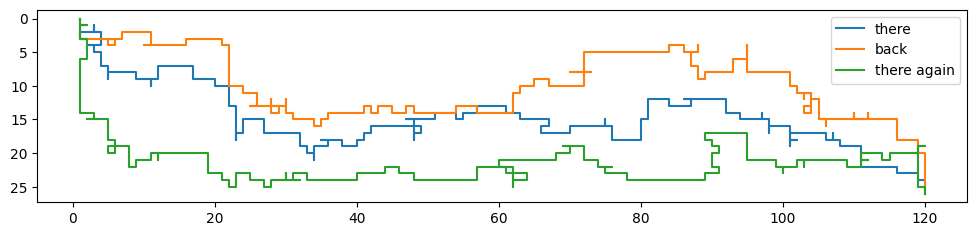

In [125]:
def plot_there_again(lines) -> tuple:
    """Plot the 3 paths."""
    bp          = BasinProblem(Grid(in24))
    there       = A_star_search(bp)
    back        = A_star_search(go_back(bp, there.path_cost))
    there_again = A_star_search(go_back(bp, back.path_cost))
    plt.figure(figsize=(12, 2.5))
    plot_path(there,       label='there')
    plot_path(back,        label='back')
    plot_path(there_again, label='there again')
    plt.legend(); plt.gca().invert_yaxis()
    
def plot_path(path, label):
    plt.plot(*T([p for t, p in path_states(path)]), label=label)

plot_there_again(in24)

It would also be interesting to see what states are explored during the process of finding a path. It is hard to visualize  three-dimensional states (time is the third dimension in our states) on a 2D display, but we can see the two-dimensional part easily, and can use a color map to see how many points in the *t* dimension are visited for each (*x*, *y*) point. In the plot below a dark blue dot means a position was visited in many different time steps; a light blue in fewer time steps.

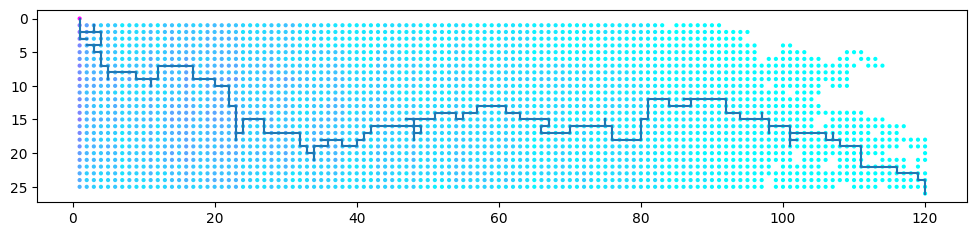

In [126]:
TESTED = Counter() # Counter of how many times an (x, y) position is goal-tested.

class CachingBasinProblem(BasinProblem):
    def is_goal(self, state) -> bool:
        TESTED[state.point] += 1
        return state.point == self.goal.point
    
plt.figure(figsize=(12, 2.5)); plt.gca().invert_yaxis()
plot_path(A_star_search(CachingBasinProblem(Grid(in24))), 'there')
plt.scatter(*T(TESTED), s=4, c=[TESTED[p] for p in TESTED], cmap='cool');

Just how many (*t*, *x*, *y*) states are visited for each (*x*, *y*) point? What count does dark blue imply? We can see a histogram where the x-axis is the number of *t* positions visited for an (*x*, *y*) point, and the y-axis counts how many times we got that count. (E.g. the left most bin says that there were almost 600 (*x*, *y*) points, each of which were visited in what looks like 1 to 8 different *t* times (mod *m*).

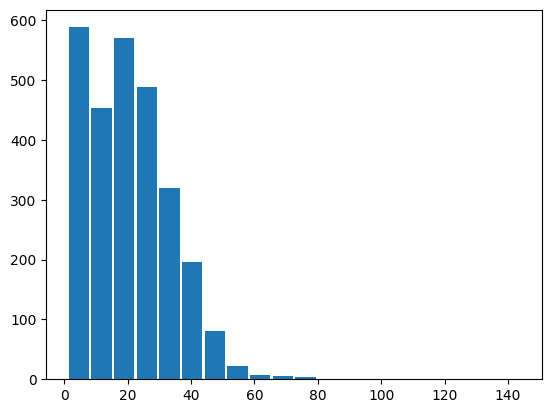

In [127]:
plt.hist(TESTED.values(), bins=20, rwidth=0.9);

# [Day 25](https://adventofcode.com/2022/day/25): Full of Hot Air

**Today's input** is a sequence of *SNAFU numbers,* one per line:

In [128]:
in25 = parse(25)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 102 strs of size 1 to 20:
────────────────────────────────────────────────────────────────────────────────────────────────────
2=1121==100=22
22-0==122-1-
10-10-2=012=2=1==1
1--000-=12-
1=2=
1==--2--22-=
11-=20==-1-211=1-21
1=2-0200=-012=
...
────────────────────────────────────────────────────────────────────────────────────────────────────


### Part 1: What SNAFU number do you supply to Bob's console?

The story says we need to add up the SNAFU numbers and input their sum to Bob's console. A SNAFU number is in base 5, except the digits are not {0, 1, 2, 3, 4}; they are {-2, -1, 0, 1, 2}, where -2 is written as "=" and -1 as "-".    

Converting SNAFU numbers to integers is easy; we can use the same formula as with "regular" base 5 numbers: ∑<sub>*i*</sub> *d*<sub>*i*</sub> 5<sup>*i*</sup>, where the digits *d*<sub>*i*</sub> are enumerated right-to-left. The only difference is that some of the digits happen to be negative.

Converting an integer to SNAFU form is a bit tricky:
- First determine the quotient *q* and remainder *r* of dividing by 5.
- If the remainder is 3 or 4, "unborrow" 1 from the *q* place, subtracting 5 from the *r* place.
- Then take the conversion of *q* (unless *q* is 0) concatenated to the lookup of digit *r*.

In [129]:
SNAFU = str # Type for SNAFU numbers
snafu_ints  = {'0': 0, '1': 1, '2': 2, '-': -1, '=': -2}
snafu_chars = invert_dict(snafu_ints)

def int_from_snafu(snafu:SNAFU) -> int:
    """Convert a SNAFU number to an integer."""
    return sum(snafu_ints[d] * 5 ** i 
               for i, d in enumerate(reversed(snafu)))

def snafu_from_int(i: int) -> SNAFU:
    """Convert an integer to a SNAFU number."""
    q, r = divmod(i, 5)
    if r in (3, 4): # "unborrow" a 1
        q, r = q + 1, r - 5
    return (snafu_from_int(q) if q else '') + snafu_chars[r]

# A few tests:
for s, i in (('2=', 8), ('1-0---0', 12345), ('1121-1110-1=0', 314159265), ('1=-1=', 353)):
    assert int_from_snafu(s) == i
    assert snafu_from_int(i) == s

answer(25.1, '2=--00--0220-0-21==1', 
       lambda: snafu_from_int(sum(map(int_from_snafu, in25))))

Puzzle 25.1:     0.1 msec, correct answer: 2=--00--0220-0-21==1

# Summary

I had some nice solutions, I think, and the code is reasonably fast (for Python). But there is a fine line between "[hard fun](http://dailypapert.com/hard-fun/)" and "[tedium](https://www.reddit.com/r/shittymoviedetails/comments/khvaxy/in_this_scene_of_the_incredibles_2004_bob_par/)", and I decided to skip the following two Part 2s:
- **17.2**: **Simulating tetris rocks for 1,000,000,000,000 steps**. 
- **22.2**: **Folding sides into a cube.** 

Here is a summary of all my answers and their run times:

In [130]:
summary(answers)

Time in milliseconds: sum = 21,753.5, mean = 462.8, median = 7.4, max = 8,796.6

Puzzle  1.1:     0.0 msec, correct answer: 70116          
Puzzle  1.2:     0.0 msec, correct answer: 206582         
Puzzle  2.1:     0.4 msec, correct answer: 13268          
Puzzle  2.2:     0.5 msec, correct answer: 15508          
Puzzle  3.1:     0.3 msec, correct answer: 8401           
Puzzle  3.2:     0.2 msec, correct answer: 2641           
Puzzle  4.1:     0.1 msec, correct answer: 477            
Puzzle  4.2:     0.1 msec, correct answer: 830            
Puzzle  5.1:     0.1 msec, correct answer: SHQWSRBDL      
Puzzle  5.2:     0.1 msec, correct answer: CDTQZHBRS      
Puzzle  6.1:     0.3 msec, correct answer: 1987           
Puzzle  6.2:     0.9 msec, correct answer: 3059           
Puzzle  7.1:     0.3 msec, correct answer: 1232307        
Puzzle  7.2:     0.3 msec, correct answer: 7268994        
Puzzle  8.1:    20.8 msec, correct answer: 1829           
Puzzle  8.2:    22.3 msec, correct

Five puzzles take over a second of run time, but none of them take over 10 seconds; the total was about 22 seconds.

You might complain that I cheated, because the time for `parse` is not counted in the time for `answer`. That's a fair complaint, but I intentionally kept the processing done by `parse` to a minimum (for example, when the input is a map of a forest or something, `parse` just returns a tuple of lines; the harder work of converting the lines to a `Grid` is done within `answer`). The total parsing time is just two milliseconds:

In [131]:
%time ignore([parse(d, show=False) for d in range(1, 26)])

CPU times: user 2.08 ms, sys: 1.17 ms, total: 3.25 ms
Wall time: 2.53 ms
